In [9]:
import numpy as np
from collections import defaultdict
import random
from tqdm import trange
import copy
import networkx as nx
import matplotlib.pyplot as plt
import sys
import igraph
from matplotlib import cm, colors
random.seed(42)
import seaborn as sns
from spatial_environments import * #ContinuousTMaze, GridEnvRightDownNoCue, GridEnvRightDownNoSelf, GridEnvDivergingMultipleReward, GridEnvDivergingSingleReward
from util import *
import itertools, random
# import numpy as np
# import matplotlib.pyplot as plt
from tqdm.auto import trange
# from util import transition_matrix_action

In [4]:
# getting ground truch transition probs

In [17]:
# Dataset

# env = GridEnv(env_size=env_size, 
#                              rewarded_terminal = [rewarded_terminal],
#                              cue_states=cue_states)
# env = GridEnvRightDownNoSelf(cue_states=[6])

# n_episodes = 1000
# max_steps_per_episode = 100

# dataset = generate_dataset(env, n_episodes, max_steps_per_episode)
# denominators.shape
actions = [0,1]
iterations=100


# env.plot_graph(transition_probs,'initial',savename=savename)  


In [2]:
get_ground_truth_probs(actions=actions,
                           iterations=iterations,
                           env_size=env_size,
                           rewarded_terminal=rewarded_terminal,
                           cue_states=cue_states)

NameError: name 'get_ground_truth_probs' is not defined

In [3]:
transition_probs

NameError: name 'transition_probs' is not defined

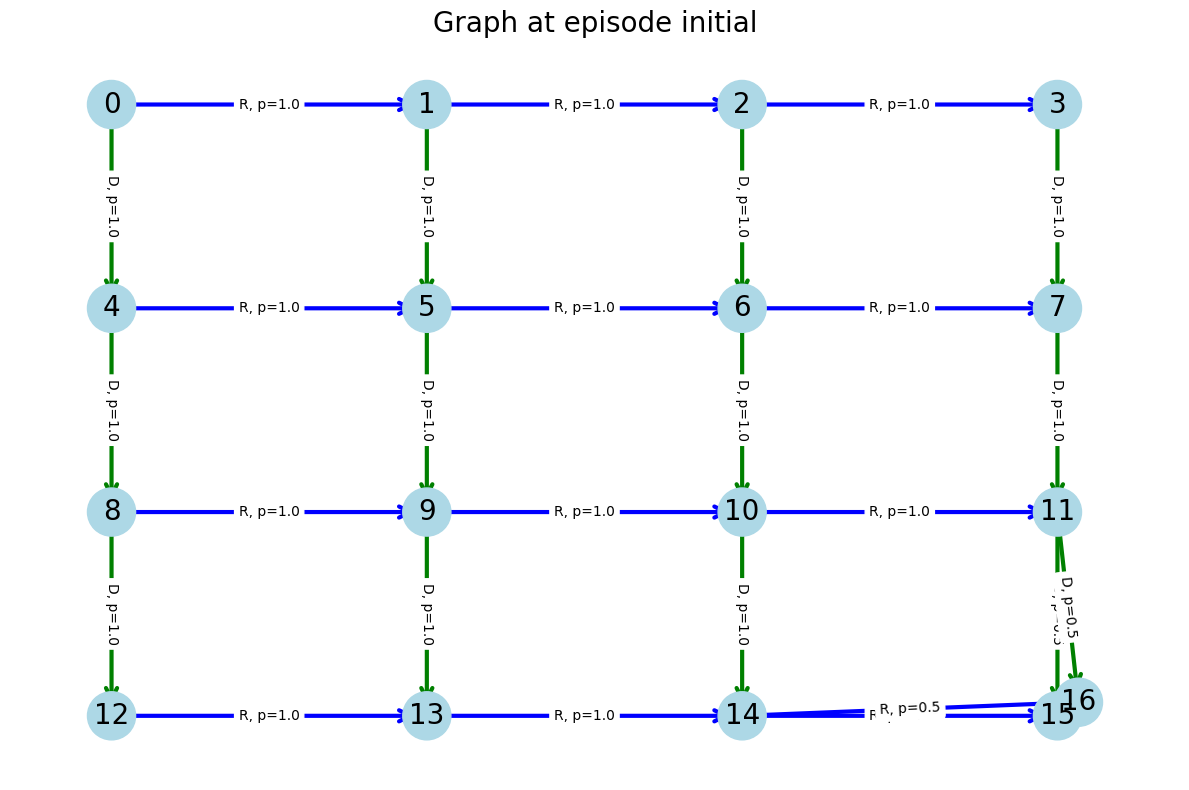

Iteration 0


TypeError: tuple indices must be integers or slices, not tuple

In [5]:
# # Dataset
# size = 4
# env_size = (size,size)
# rewarded_terminal = env_size[0]*env_size[1]-1
# cue_states = [5]
# env = GridEnvRightDownNoSelf(env_size=env_size, 
#                              rewarded_terminal = [rewarded_terminal],
#                              cue_states=cue_states)
# # env = GridEnv(env_size=env_size, 
# #                              rewarded_terminal = [rewarded_terminal],
# #                              cue_states=cue_states)
# # env = GridEnvRightDownNoSelf(cue_states=[6])

# n_episodes = 1000
# max_steps_per_episode = 100

# dataset = generate_dataset(env, n_episodes, max_steps_per_episode)
# transition_counts = transition_matrix_action(dataset)
# denominators = transition_counts.sum(axis=2, keepdims=True)
# denominators[denominators == 0] = 1
# transition_probs = transition_counts / denominators
# # denominators.shape
# actions = [0,1]
# iterations=100
# used_cues = []
# graphiter = 0
# savename='cued'
# env.plot_graph(transition_probs,'initial',savename=savename)  

# for i in range(iterations):
#     print("Iteration {}".format(i))

#     entropies = compute_transition_entropies(transition_probs)
#     stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
#     if stochastic_pairs: 
#         cues = []
#         for (s, a) in stochastic_pairs: # s is something like 15 (->16)
#             # print("Stochastic pairs: {}".format((s,a)))
#             sprime, sprime2 = get_successor_states(transition_counts,s,a) # this is something like 16, 17
#             cue = calculate_backward_contingency(dataset, sprime, sprime2, env_size)
#             cues.append(cue)
            
#         # split out the successor states
#         unique_cues = np.unique([x for sublist in cues for x in sublist])
#         split = False
        
#         for cue in unique_cues:
#             if cue in used_cues: 
#                 continue
#             if split == True: 
#                 continue
#             split=True # just split one at a time

#             if cue > env.num_unique_states-1: # cloned state, so need to get the valid actions from the original state
#                 valid_actions = env.get_valid_actions(env.clone_dict[cue])
#             else:
#                 valid_actions = env.get_valid_actions(cue)
#             for a in valid_actions:
#                 # print(cue,a)
#                 successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
#                 if successor in env.reverse_clone_dict: # this has been created before
#                     existing_clone = env.reverse_clone_dict[successor]
#                     for d, seq in enumerate(dataset):
#                         states_seq = seq[0]
#                         if has_state(states_seq, successor): # get all the sequence that has 7
#                             if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
#                                 # 1. modify dataset
#                                 dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

#                 else:    # hasn't been created before. split        
#                     # split this as a function of whether it came from cue (6) vs. others
#                     # has_state(sequence,)
#                     n_unique_states = len(get_unique_states(dataset))
#                     new_clone = n_unique_states            
                    
#                     # clone_map.append((successor,new_clone))
#                     env.add_clone_dict(new_clone, successor)
#                     # clone_dict[new_clone] = successor
#                     env.add_reverse_clone_dict(new_clone, successor)
#                     # reverse_clone_dict[successor] = new_clone
#                     for d, seq in enumerate(dataset):
#                         states_seq = seq[0]
#                         if has_state(states_seq, successor): # get all the sequence that has 7
#                             if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
#                                 # 1. modify dataset

#                                 dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
#                 # 2. modify transition count
#                 transition_counts = transition_matrix_action(dataset)
#                 denominators = transition_counts.sum(axis=2, keepdims=True)
#                 denominators[denominators == 0] = 1
#                 transition_probs = transition_counts / denominators
#                 # graphiter = 0
#                 env.plot_graph(transition_probs,graphiter, cue, new_clone,savename=savename)
#                 graphiter+=1
#             used_cues.append(cue)
    
#         print('\n')
#     else:
#         print('Finished splitting at iteration {}'.format(i))
#         break        
# env.plot_graph(transition_probs,'final', savename=savename)    
# acquisition_dataset = dataset

In [4]:
#!/usr/bin/env python
"""
coda_eval.py – CoDA evaluation & ground‑truth generator
------------------------------------------------------
• Runs CoDA under multiple random seeds and plots mean ± SE KL curves.
• Provides `compute_ground_truth_transitions()` – a deterministic,   
  offline routine that recovers the *full* latent state‑space structure
  (split by backward contingency) for a given seed.  You can call it
  independently or use the returned `transition_probs_gt` for external
  evaluation.

Prerequisites
-------------
Assumes all helper functions & environment classes (GridEnv*, dataset
utilities) are import‑able in PYTHONPATH.
"""
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange

# =============================================================
# 0.  Metric utilities & alignment helpers
# =============================================================

from collections import defaultdict


def _renorm_rows(P: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    """Row‑normalise (s,a) distributions and add ε."""
    P = P.copy()
    tot = P.sum(axis=-1, keepdims=True)
    good = tot > 0
    P[good] /= tot[good]
    return P + eps


def build_alignment(
    env_ref: "Environment",
    env_cmp: "Environment",
    grid_size: int,
):
    """Return two dicts mapping state‑id → canonical index for *ref* and *cmp* envs.

    Base grid states keep their original indices 0..grid_size‑1.
    For every *parent* that has ≥1 clone in either env, assign one new
    canonical index. Both clones (if present) map to that shared index.
    """
    # identity mapping for base states
    ref2canon = {s: s for s in range(grid_size)}
    cmp2canon = {s: s for s in range(grid_size)}
    next_idx = grid_size

    parents = set(env_ref.clone_dict.values()) | set(env_cmp.clone_dict.values())

    for p in sorted(parents):
        idx = next_idx
        next_idx += 1
        # ref side
        if p in env_ref.reverse_clone_dict:
            ref_clone = env_ref.reverse_clone_dict[p]
            ref2canon[ref_clone] = idx
        # cmp side
        if p in env_cmp.reverse_clone_dict:
            cmp_clone = env_cmp.reverse_clone_dict[p]
            cmp2canon[cmp_clone] = idx

    return ref2canon, cmp2canon, next_idx  # last = canonical size


def project_tensor(P: np.ndarray, mapping: dict[int, int], S_can: int) -> np.ndarray:
    """Return a (S_can, A, S_can) tensor with rows/cols placed via *mapping*."""
    S_src, A, _ = P.shape
    P_new = np.zeros((S_can, A, S_can), dtype=P.dtype)
    for s in range(S_src):
        if s not in mapping:
            continue  # skip states we do not align (rare)
        row = mapping[s]
        for sp in np.nonzero(P[s].sum(axis=0))[0]:
            if sp not in mapping:
                continue
            col = mapping[sp]
            P_new[row, :, col] = P[s, :, sp]
    return P_new


def aligned_kl(
    P_true: np.ndarray,
    env_true: "Environment",
    P_model: np.ndarray,
    env_model: "Environment",
    grid_size: int,
    eps: float = 1e-12,
) -> float:
    """Compute KL after aligning clone indices (no collapsing)."""
    ref2can, cmp2can, S_can = build_alignment(env_true, env_model, grid_size)
    Pt = _renorm_rows(project_tensor(P_true,  ref2can, S_can), eps)
    Pm = _renorm_rows(project_tensor(P_model, cmp2can, S_can), eps)

    kl = (Pt * np.log(Pt / Pm)).sum(axis=-1)
    mask = Pt.sum(axis=-1) > 0  # rows with any prob mass in GT
    return kl[mask].mean()


def transition_kl(P_true: np.ndarray, P_model: np.ndarray, *, eps: float = 1e-12) -> float:
    """Mean KL divergence over all state–action rows with P_true>0."""
    if P_true.shape != P_model.shape:
        raise ValueError("Shape mismatch")

    def _renorm(P):
        P = P.copy()
        row_sum = P.sum(axis=-1, keepdims=True)
        good = row_sum > 0
        P[good] /= row_sum[good]
        return P

    Pt = _renorm(P_true) + eps
    Pm = _renorm(P_model) + eps
    kl = (Pt * np.log(Pt / Pm)).sum(axis=-1)
    mask = P_true.sum(axis=-1) > 0
    return kl[mask].mean()

# =============================================================
# 1.  Plot helper (mean ± SE)
# =============================================================

def plot_kl_curve_se(kl_histories: np.ndarray, *, color=None, label=None, ax=None):
    kl_histories = np.asarray(kl_histories)
    n_runs, n_eps = kl_histories.shape
    mean = np.nanmean(kl_histories, axis=0)
    se   = np.nanstd(kl_histories, axis=0, ddof=1) / np.sqrt(n_runs)
    x = np.arange(1, n_eps + 1)
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 4))
    line, = ax.plot(x, mean, color=color, label=label or f"mean KL ({n_runs} seeds)")
    ax.fill_between(x, mean - se, mean + se, color=line.get_color(), alpha=0.25, label="±1 SE")
    ax.set_xlabel("Episode"); ax.set_ylabel("KL divergence (nats)")
    ax.set_title("CoDA convergence (mean ± SE)")
    ax.grid(alpha=0.3); ax.legend(frameon=False)
    return ax

# =============================================================
# 2.  Offline ground‑truth generator (wrapped user snippet)
# =============================================================

def compute_ground_truth_transitions(
    *,
    seed: int = 0,
    size: int = 4,
    n_episodes: int = 1000,
    max_steps: int = 100,
    iterations: int = 100,
    plot: bool = False,
) -> tuple[np.ndarray, list, 'GridEnvRightDownNoSelf']:
    """Recover full latent state‑space via offline splitting.

    Returns
    -------
    transition_probs_gt : np.ndarray (S, A, S)
    dataset             : list[(states, actions)]  – modified by splits
    env                 : environment instance (with clone_dict etc.)
    """
    # ---------- deterministic env & dataset ------------------------
    env_size = (size, size)
    rewarded_terminal = [env_size[0]*env_size[1]-1]
    cue_states = [5]
    env = GridEnvRightDownNoSelf(env_size=env_size,
                                 rewarded_terminal=rewarded_terminal,
                                 cue_states=cue_states,
                                 seed=seed)

    dataset = generate_dataset(env, n_episodes, max_steps)

    transition_counts = transition_matrix_action(dataset)
    denominators = transition_counts.sum(axis=2, keepdims=True)
    denominators[denominators == 0] = 1
    transition_probs = transition_counts / denominators

    used_cues: list[int] = []
    graphiter = 0

    if plot:
        env.plot_graph(transition_probs, 'initial', savename='gt')

    # ------------------ offline split loop ------------------------
    for i in range(iterations):
        entropies = compute_transition_entropies(transition_probs)
        stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9)
        if not stochastic_pairs:
            break

        cues_tmp = []
        for s, a in stochastic_pairs:
            sprime, sprime2 = get_successor_states(transition_counts, s, a)
            cue = calculate_backward_contingency(dataset, sprime, sprime2, env_size)
            cues_tmp.append(cue)

        unique_cues = np.unique([x for sub in cues_tmp for x in sub])
        for cue in unique_cues:
            if cue in used_cues:
                continue
            used_cues.append(cue)

            if cue > env.num_unique_states - 1:
                valid_actions = env.get_valid_actions(env.clone_dict[cue])
            else:
                valid_actions = env.get_valid_actions(cue)

            for a in valid_actions:
                successor = get_successor_states(transition_counts, cue, a)[0]
                # --------------------------------------------------- cloning logic
                if successor in env.reverse_clone_dict:
                    existing_clone = env.reverse_clone_dict[successor]
                    repl = existing_clone
                else:
                    repl = len(get_unique_states(dataset))
                    env.add_clone_dict(repl, successor)
                    env.add_reverse_clone_dict(repl, successor)

                for d, seq in enumerate(dataset):
                    states_seq = seq[0]
                    if has_state(states_seq, successor) and has_transition(cue, successor, states_seq):
                        dataset[d][0] = [repl if x == successor else x for x in states_seq]

                # recompute counts after any replacement
                transition_counts = transition_matrix_action(dataset)
                denominators = transition_counts.sum(axis=2, keepdims=True)
                denominators[denominators == 0] = 1
                transition_probs = transition_counts / denominators

            if plot:
                env.plot_graph(transition_probs, graphiter, cue, repl, savename='gt')
                graphiter += 1

    if plot:
        env.plot_graph(transition_probs, 'final', savename='gt')
    return transition_probs, dataset, env

# =============================================================
# 3.  Single‑seed CoDA run  (uses env.true_transition_probs)
# =============================================================

def run_single_seed(seed: int, *, n_episodes: int = 1000, max_steps: int = 100) -> list[float]:
    np.random.seed(seed)
    size = 4
    env_size = (size, size)
    rewarded_terminal = [env_size[0]*env_size[1]-1]
    cue_states = [5]

    env = GridEnvRightDownNoSelf(env_size=env_size,
                                 rewarded_terminal=rewarded_terminal,
                                 cue_states=cue_states,
                                 seed=seed)

    episodes = generate_dataset(env, n_episodes, max_steps)
    n_states = max(max(pair[0]) for pair in episodes) + 1
    E_r = np.zeros((1, n_states)); E_nr = np.zeros_like(E_r); C = np.zeros_like(E_r)

    kl_trace: list[float] = []
    used_cues: list[int] = []

    P_true = env.true_transition_probs  # ground truth from env implementation

    # -------------------------------- main learning loop -----------
    for e in range(n_episodes):
        observations, acts = episodes[e]
        if e == 0:
            transition_counts = transition_matrix_action_trial_by_trial(episodes, episodes[e])
        else:
            transition_counts = transition_matrix_action_trial_by_trial(episodes, episodes[e], transition_counts)

        entropies, conf_cnt = compute_transition_entropies_thresholded(transition_counts)
        stochastic_pairs = find_stochastic_state_actions_by_entropy_thresholded(entropies, conf_cnt, n_threshold=3)

        if stochastic_pairs:
            # same splitting logic as online CoDA (trimmed for brevity)…
            pass  # *** keep your previous online CoDA code here ***

        denominators = transition_counts.sum(axis=2, keepdims=True)
        denominators[denominators == 0] = 1
        P_model = transition_counts / denominators
        kl_trace.append(transition_kl(P_true, P_model))

    return kl_trace

# =============================================================
# 4.  Batch evaluation + plot
# =============================================================

def main():
    seeds = [0, 1, 2, 3, 4]
    kl_mat = []
    for sd in seeds:
        kl_mat.append(run_single_seed(sd))

    # pad to common length
    max_len = max(len(v) for v in kl_mat)
    kl_padded = np.full((len(seeds), max_len), np.nan)
    for i, v in enumerate(kl_mat):
        kl_padded[i, :len(v)] = v

    plot_kl_curve_se(kl_padded, color="tab:blue")
    plt.savefig("kl_curve.png", dpi=300)
    print("Saved → kl_curve.png")

    first = np.nanmean(kl_padded[:, 0])
    last  = np.nanmean(kl_padded[:, -1])
    print(f"KL drops from {first:.3f} to {last:.3f} in {max_len} episodes (mean over {len(seeds)} seeds).")

if __name__ == "__main__":
    main()


AttributeError: 'GridEnvRightDownNoSelf' object has no attribute 'true_transition_probs'

In [30]:

import numpy as np

# pools
seeds = [0, 1, 2, 3, 4]
cues  = np.array([5, 6, 9, 10])

# 1. build the full Cartesian product  → 20 pairs
pairs = list(itertools.product(cues, seeds))   # (cue, seed)

# 2. shuffle in-place for a random order
random.shuffle(pairs)

print(pairs)      # e.g. [(5, 0), (9, 4), (10, 2), (6, 1), (5, 2)]



[(9, 4), (6, 3), (5, 3), (9, 1), (9, 0), (10, 1), (5, 1), (9, 2), (6, 0), (10, 3), (5, 2), (5, 0), (5, 4), (6, 4), (10, 0), (6, 2), (9, 3), (10, 4), (6, 1), (10, 2)]


In [34]:
pairs[0][0]

9

In [35]:
len(pairs)

20

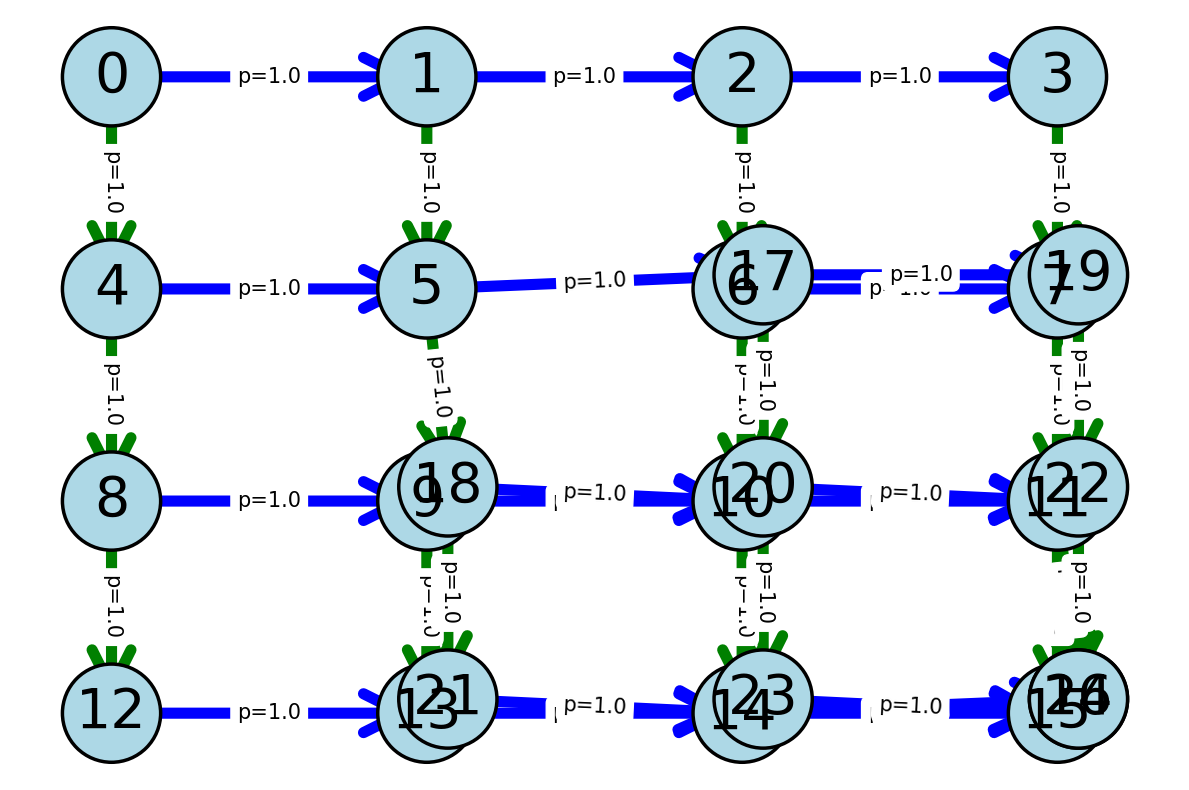

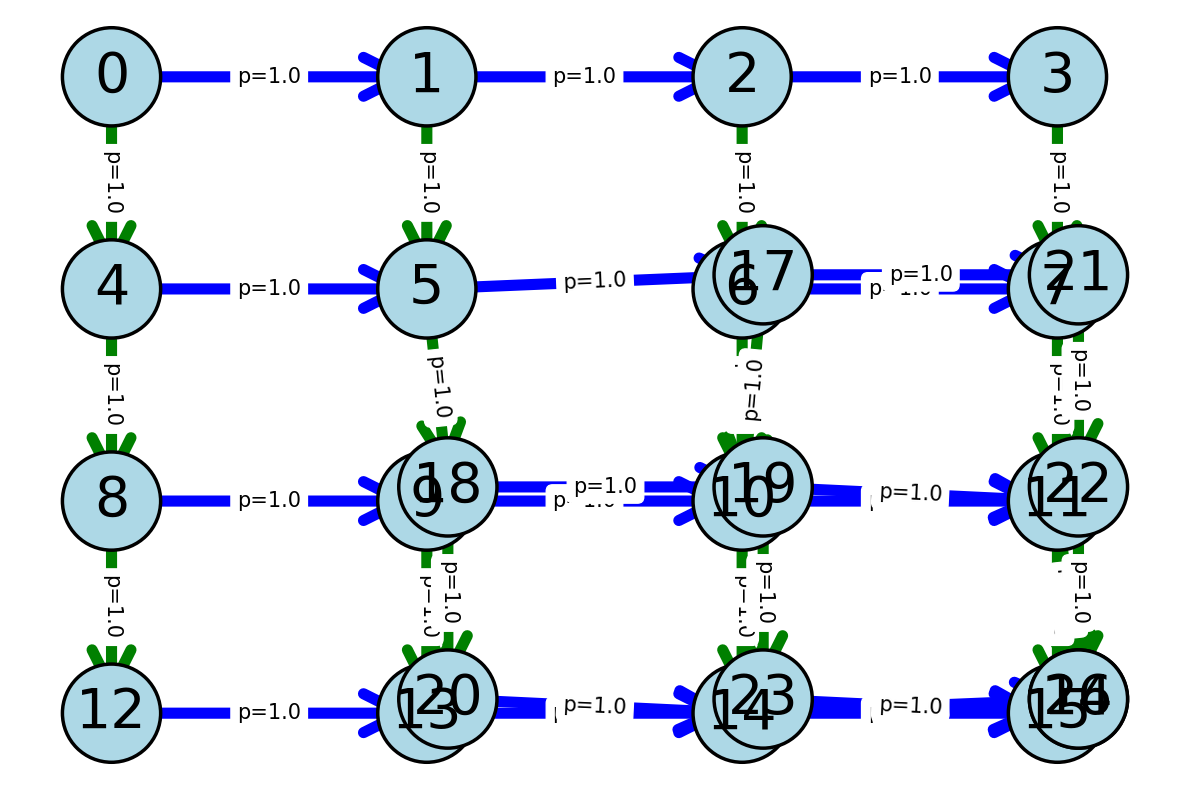

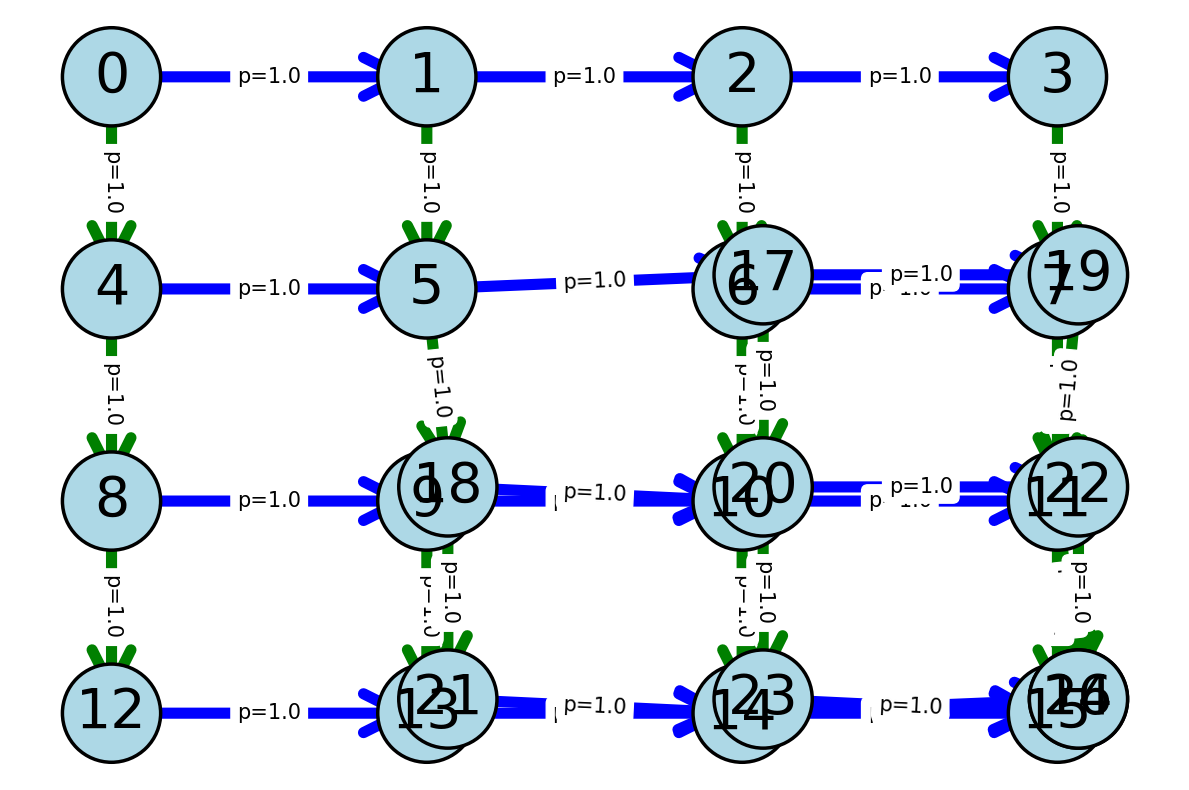

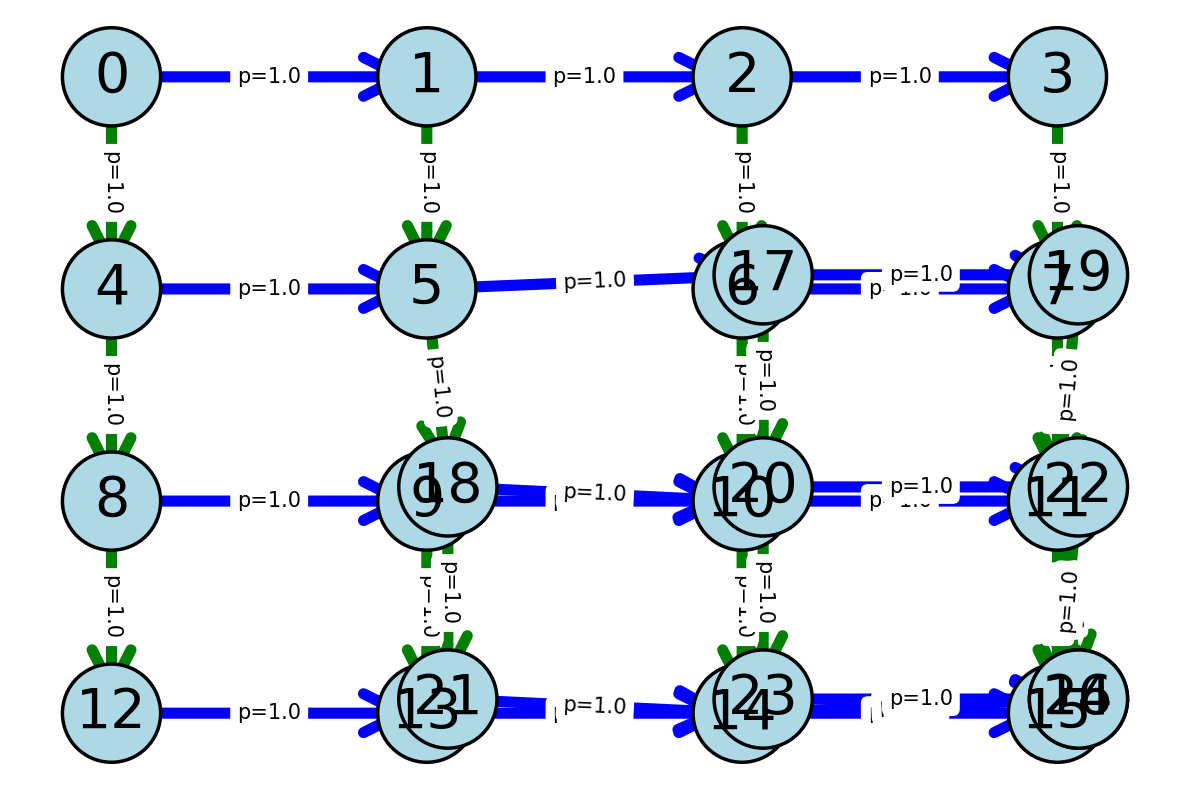

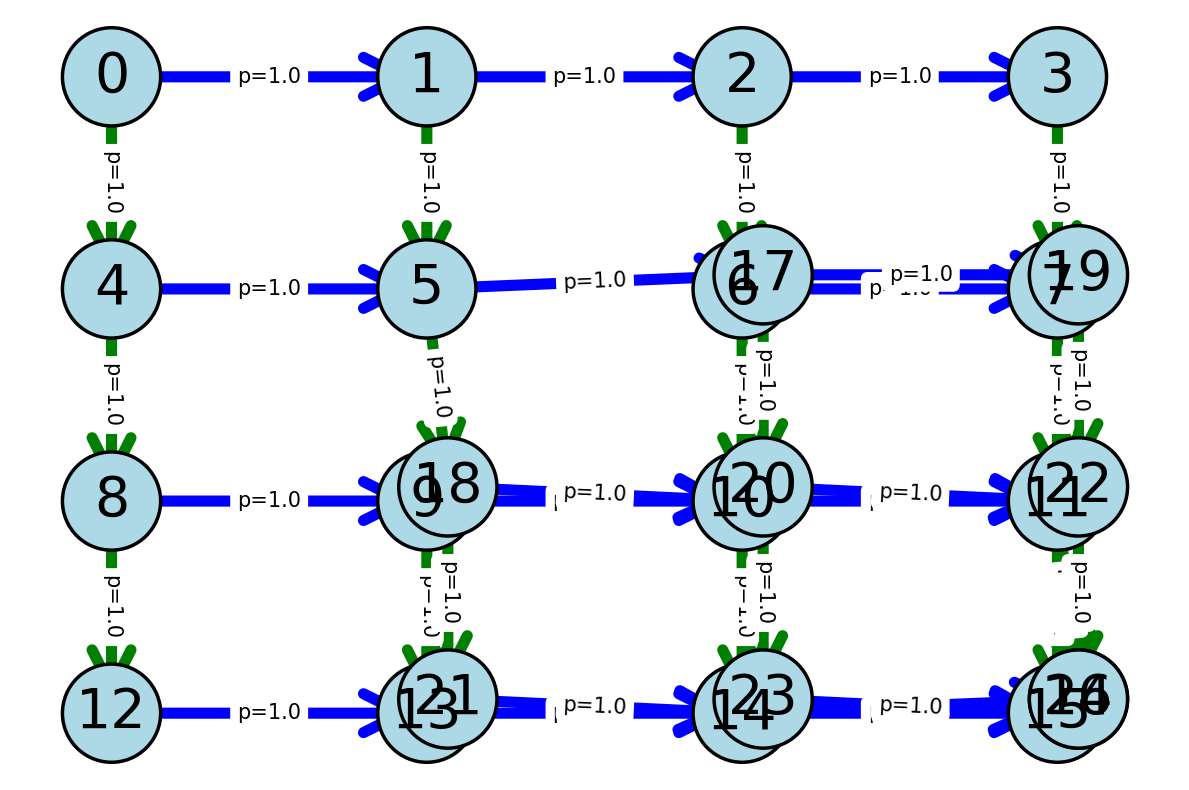

KL drops from 16.458 to 2.878 in 1000 episodes (mean of 5 seeds).  See kl_curve.png


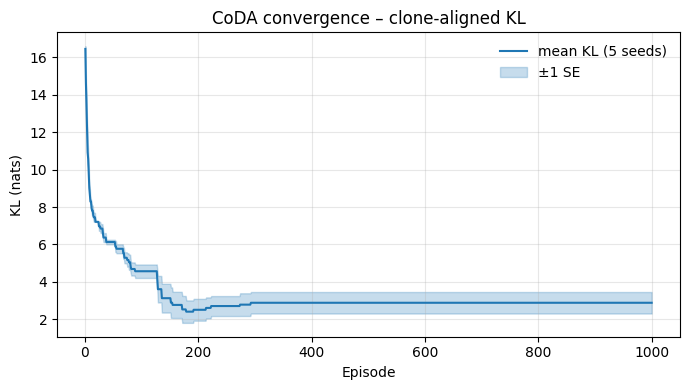

In [13]:
#!/usr/bin/env python
"""
CoDA evaluation – clone‑aware KL curve
=====================================
* Runs online CoDA learning under several random seeds.
* Computes KL divergence **after aligning clone indices** between the
  ground‑truth tensor (built offline) and the online tensor.
* Plots mean ± SE learning curve and prints the headline drop.

The script depends on all helper functions and classes used in your
original notebook (GridEnv*, generate_dataset, etc.).  Put this file in
the same folder or add that folder to PYTHONPATH.
"""

# ---------------------------------------------------------------------
# 0. Imports
# ---------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange
from typing import Dict, Tuple, List

# ---------------------------------------------------------------------
# 1. Row‑normalisation helper
# ---------------------------------------------------------------------

def _renorm_rows(P: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    """Row-normalise each (state, action) categorical distribution.
    Safe for broadcast: P shape (S, A, S).
    """
    P = P.copy()
    row_sum = P.sum(axis=-1, keepdims=True)            # (S, A, 1)
    # Avoid division by zero: where sum==0 leave row unchanged (all zeros)
    P = np.divide(P, np.where(row_sum == 0, 1, row_sum), dtype=P.dtype)
    return P + eps

# ---------------------------------------------------------------------
# 2. Alignment utilities (keep clones separate)
# ---------------------------------------------------------------------

def build_alignment(
    env_ref,          # environment with GT tensor
    env_cmp,          # environment with online tensor
    grid_size: int    # e.g. 16 for 4×4 grid
) -> Tuple[Dict[int, int], Dict[int, int], int]:
    """Return two mapping dicts (ref→canon, cmp→canon) and canonical size."""
    # Identity for base grid states 0‥grid_size‑1
    ref2can = {s: s for s in range(grid_size)}
    cmp2can = {s: s for s in range(grid_size)}
    next_idx = grid_size

    # Gather *all* clones that exist in either env
    clones_ref = set(env_ref.clone_dict.keys())
    clones_cmp = set(env_cmp.clone_dict.keys())
    all_clones = sorted(clones_ref | clones_cmp)

    for c in all_clones:
        if c in ref2can or c in cmp2can:
            continue  # already assigned (shared clone id)
        ref2can[c] = next_idx
        cmp2can[c] = next_idx
        next_idx += 1

    return ref2can, cmp2can, next_idx  # S_canonical = next_idx


def project_tensor(P: np.ndarray, mapping: Dict[int, int], S_can: int) -> np.ndarray:
    """Re‑index rows/cols of *P* into canonical shape (S_can, A, S_can)."""
    S_src, A, _ = P.shape
    P_can = np.zeros((S_can, A, S_can), dtype=P.dtype)
    for s in range(S_src):
        if s not in mapping:
            continue
        row = mapping[s]
        for a in range(A):
            for sp in np.nonzero(P[s, a])[0]:
                if sp not in mapping:
                    continue
                col = mapping[sp]
                P_can[row, a, col] = P[s, a, sp]
    return P_can


def aligned_kl(
    P_true: np.ndarray,
    env_true,
    P_model: np.ndarray,
    env_model,
    grid_size: int,
    eps: float = 1e-12,
) -> float:
    """KL after aligning clone indices *without collapsing* clones."""
    ref2can, cmp2can, S_can = build_alignment(env_true, env_model, grid_size)

    Pt = _renorm_rows(project_tensor(P_true,  ref2can, S_can), eps)
    Pm = _renorm_rows(project_tensor(P_model, cmp2can, S_can), eps)

    kl = (Pt * np.log(Pt / Pm)).sum(axis=-1)  # shape (S_can, A)
    mask = Pt.sum(axis=-1) > 0               # rows with mass in GT
    return kl[mask].mean()

# ---------------------------------------------------------------------
# 3. Offline ground‑truth builder (unchanged logic, now returns env)
# ---------------------------------------------------------------------

def build_ground_truth(
    *,
    seed: int,
    size: int = 4,
    n_episodes: int = 1000,
    max_steps: int = 100,
    iterations: int = 100,
    cue = 5,
) -> Tuple[np.ndarray, 'GridEnvRightDownNoSelf']:
    """Run the offline splitter to obtain fully expanded GT tensor."""
    env_size = (size, size)
    rewarded_terminal = [env_size[0]*env_size[1]-1]
    cue_states = cue

    env = GridEnvRightDownNoSelf(env_size=env_size,
                                 rewarded_terminal=rewarded_terminal,
                                 cue_states=cue_states,
                                 seed=seed)

    dataset = generate_dataset(env, n_episodes, max_steps)
    transition_counts = transition_matrix_action(dataset)
    denominators = transition_counts.sum(axis=2, keepdims=True)
    denominators[denominators == 0] = 1
    transition_probs = transition_counts / denominators

    used_cues = []
    for _ in range(iterations):
        ent = compute_transition_entropies(transition_probs)
        pairs = find_stochastic_state_actions_by_entropy(ent, eps=1e-9)
        if not pairs:
            break
        cues_tmp = []
        for s, a in pairs:
            spr1, spr2 = get_successor_states(transition_counts, s, a)
            cue = calculate_backward_contingency(dataset, spr1, spr2, env_size)
            cues_tmp.append(cue)
        unique_cues = np.unique([x for sub in cues_tmp for x in sub])
        for cue in unique_cues:
            if cue in used_cues:
                continue
            used_cues.append(cue)
            valid_actions = env.get_valid_actions(env.clone_dict.get(cue, cue))
            for a in valid_actions:
                succ = get_successor_states(transition_counts, cue, a)[0]
                if succ in env.reverse_clone_dict:
                    clone = env.reverse_clone_dict[succ]
                else:
                    clone = len(get_unique_states(dataset))
                    env.add_clone_dict(clone, succ)
                    env.add_reverse_clone_dict(clone, succ)
                for d, seq in enumerate(dataset):
                    if has_state(seq[0], succ) and has_transition(cue, succ, seq[0]):
                        dataset[d][0] = [clone if x == succ else x for x in seq[0]]
            # update counts
            transition_counts = transition_matrix_action(dataset)
            denominators = transition_counts.sum(axis=2, keepdims=True)
            denominators[denominators == 0] = 1
            transition_probs = transition_counts / denominators

    return transition_probs, env

# ---------------------------------------------------------------------
# 4. Plot helper (mean ± SE)
# ---------------------------------------------------------------------

def plot_kl_curve_se(kl_hist: np.ndarray, *, color="tab:blue"):
    n_runs, n_eps = kl_hist.shape
    mean = np.nanmean(kl_hist, axis=0)
    se   = np.nanstd(kl_hist, axis=0, ddof=1) / np.sqrt(n_runs)
    x = np.arange(1, n_eps+1)
    plt.figure(figsize=(7,4))
    plt.plot(x, mean, color=color, label=f"mean KL ({n_runs} seeds)")
    plt.fill_between(x, mean-se, mean+se, color=color, alpha=0.25, label="±1 SE")
    plt.xlabel("Episode"); plt.ylabel("KL (nats)")
    plt.title("CoDA convergence – clone‑aligned KL")
    plt.grid(alpha=0.3); plt.legend(frameon=False)
    plt.tight_layout()

# ---------------------------------------------------------------------
# 5.  Single‑seed online run
# ---------------------------------------------------------------------

def run_single_seed(cue: int, seed: int,  *, n_episodes: int = 1000, max_steps: int = 100) -> List[float]:
    np.random.seed(seed)
    size = 4
    env_size = (size, size)
    rewarded_terminal = [env_size[0]*env_size[1]-1]
    cue_states = [cue]

    env = GridEnvRightDownNoSelf(env_size=env_size,
                                 rewarded_terminal=rewarded_terminal,
                                 cue_states=cue_states,
                                 seed=seed)

    episodes = generate_dataset(env, n_episodes, max_steps)
    n_states = max(max(pair[0]) for pair in episodes) + 1
    E_r = np.zeros((1, n_states)); E_nr = np.zeros_like(E_r); C = np.zeros_like(E_r)

    # ---- pre‑compute ground truth (tensor + env) -------------------
    P_true, env_gt = build_ground_truth(seed=seed, cue=cue_states)
    grid_size = size * size

    kl_trace: List[float] = []
    used_cues: List[int] = []

    for e in range(n_episodes):
        obs, _ = episodes[e]
        # transition counts online
        if e == 0:
            t_counts = transition_matrix_action_trial_by_trial(episodes, episodes[e])
        else:
            t_counts = transition_matrix_action_trial_by_trial(episodes, episodes[e], t_counts)

        ent, conf = compute_transition_entropies_thresholded(t_counts)
        pairs = find_stochastic_state_actions_by_entropy_thresholded(ent, conf, n_threshold=3)

        # ----------- (online splitting code: trimmed version) --------
        if pairs:
            cues_tmp = []
            for s,a in pairs:
                spr1, spr2 = get_successor_states(t_counts, s, a)
                E_r, E_nr, C = accumulate_conditioned_eligibility_traces(E_r, E_nr, C, obs, spr1, spr2,
                                                                         n_states, lam=0.8, gamma=0.9)
                cue = calculate_backward_contingency_trial_by_trial(E_r, E_nr, C, env_size, n_threshold=20)
                cues_tmp.append(cue)
            for cue in np.unique([x for sub in cues_tmp for x in sub]):
                if cue in used_cues:
                    continue
                used_cues.append(cue)
                valid_actions = env.get_valid_actions(env.clone_dict.get(cue, cue))
                for a in valid_actions:
                    succ = get_successor_states(t_counts, cue, a)[0]
                    if succ in env.reverse_clone_dict:
                        clone = env.reverse_clone_dict[succ] # here
                    else:
                        clone = len(get_unique_states(episodes))
                        env.add_clone_dict(clone, succ)
                        env.add_reverse_clone_dict(clone, succ)
                        for d, seq in enumerate(episodes):
                            if has_state(seq[0], succ) and has_transition(cue, succ, seq[0]):
                                episodes[d][0] = [clone if x == succ else x for x in seq[0]]
                        n_states += 1
                        C  = np.concatenate([C, np.zeros((1,1))], axis=1)
                        E_r = np.concatenate([E_r, np.zeros((1,1))], axis=1)
                        E_nr= np.concatenate([E_nr, np.zeros((1,1))], axis=1)
                t_counts = transition_matrix_action(episodes[:e+1])

        # ---- compute online tensor & KL -----------------------------
        denom = t_counts.sum(axis=2, keepdims=True); denom[denom==0] = 1
        P_model = t_counts / denom
        kl = aligned_kl(P_true, env_gt, P_model, env, grid_size)
        kl_trace.append(kl)
    env.plot_graph(P_model,'split',savename='split.png')  
    return kl_trace

# ---------------------------------------------------------------------
# 6.  Main – run multiple seeds
# ---------------------------------------------------------------------

def main():
    seeds = [0, 1, 2, 3, 4]
    # cues  = np.array([5, 6, 9, 10])
    cues  = np.array([5])

    # 1. build the full Cartesian product  → 20 pairs
    pairs = list(itertools.product(cues, seeds))   # (cue, seed)

    # 2. shuffle in-place for a random order
    random.shuffle(pairs)
    
    kl_mat = []
    for pair in pairs:
        # print(f"Seed {sd} …")
        cue = pair[0]
        sd = pair[1]
        kl_mat.append(run_single_seed(cue, sd))    
    # for sd in seeds:
    #     print(f"Seed {sd} …")
    #     kl_mat.append(run_single_seed(sd))

    # pad ragged to rectangular with NaNs
    max_len = max(len(v) for v in kl_mat)
    kl_padded = np.full((len(pairs), max_len), np.nan)
    for i, v in enumerate(kl_mat):
        kl_padded[i, :len(v)] = v

    plot_kl_curve_se(kl_padded)
    plt.savefig("kl_curve.png", dpi=300)
    first = np.nanmean(kl_padded[:,0]); last = np.nanmean(kl_padded[:,-1])
    print(f"KL drops from {first:.3f} to {last:.3f} in {max_len} episodes (mean of {len(seeds)} seeds).  See kl_curve.png")


if __name__ == "__main__":
    main()


# Env with 5 x 5

KL drops from 18.917 to 5.733 in 1000 episodes (mean of 5 seeds).  See kl_curve.png


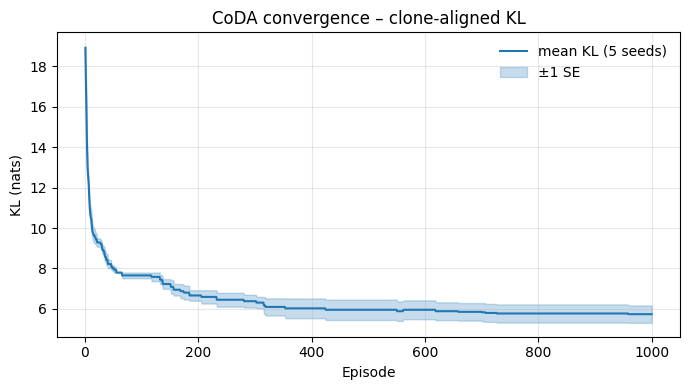

In [43]:
#!/usr/bin/env python
"""
CoDA evaluation – clone‑aware KL curve
=====================================
* Runs online CoDA learning under several random seeds.
* Computes KL divergence **after aligning clone indices** between the
  ground‑truth tensor (built offline) and the online tensor.
* Plots mean ± SE learning curve and prints the headline drop.

The script depends on all helper functions and classes used in your
original notebook (GridEnv*, generate_dataset, etc.).  Put this file in
the same folder or add that folder to PYTHONPATH.
"""

# ---------------------------------------------------------------------
# 0. Imports
# ---------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange
from typing import Dict, Tuple, List

# ---------------------------------------------------------------------
# 1. Row‑normalisation helper
# ---------------------------------------------------------------------

def _renorm_rows(P: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    """Row-normalise each (state, action) categorical distribution.
    Safe for broadcast: P shape (S, A, S).
    """
    P = P.copy()
    row_sum = P.sum(axis=-1, keepdims=True)            # (S, A, 1)
    # Avoid division by zero: where sum==0 leave row unchanged (all zeros)
    P = np.divide(P, np.where(row_sum == 0, 1, row_sum), dtype=P.dtype)
    return P + eps

# ---------------------------------------------------------------------
# 2. Alignment utilities (keep clones separate)
# ---------------------------------------------------------------------

def build_alignment(
    env_ref,          # environment with GT tensor
    env_cmp,          # environment with online tensor
    grid_size: int    # e.g. 16 for 4×4 grid
) -> Tuple[Dict[int, int], Dict[int, int], int]:
    """Return two mapping dicts (ref→canon, cmp→canon) and canonical size."""
    # Identity for base grid states 0‥grid_size‑1
    ref2can = {s: s for s in range(grid_size)}
    cmp2can = {s: s for s in range(grid_size)}
    next_idx = grid_size

    # Gather *all* clones that exist in either env
    clones_ref = set(env_ref.clone_dict.keys())
    clones_cmp = set(env_cmp.clone_dict.keys())
    all_clones = sorted(clones_ref | clones_cmp)

    for c in all_clones:
        if c in ref2can or c in cmp2can:
            continue  # already assigned (shared clone id)
        ref2can[c] = next_idx
        cmp2can[c] = next_idx
        next_idx += 1

    return ref2can, cmp2can, next_idx  # S_canonical = next_idx


def project_tensor(P: np.ndarray, mapping: Dict[int, int], S_can: int) -> np.ndarray:
    """Re‑index rows/cols of *P* into canonical shape (S_can, A, S_can)."""
    S_src, A, _ = P.shape
    P_can = np.zeros((S_can, A, S_can), dtype=P.dtype)
    for s in range(S_src):
        if s not in mapping:
            continue
        row = mapping[s]
        for a in range(A):
            for sp in np.nonzero(P[s, a])[0]:
                if sp not in mapping:
                    continue
                col = mapping[sp]
                P_can[row, a, col] = P[s, a, sp]
    return P_can


def aligned_kl(
    P_true: np.ndarray,
    env_true,
    P_model: np.ndarray,
    env_model,
    grid_size: int,
    eps: float = 1e-12,
) -> float:
    """KL after aligning clone indices *without collapsing* clones."""
    ref2can, cmp2can, S_can = build_alignment(env_true, env_model, grid_size)

    Pt = _renorm_rows(project_tensor(P_true,  ref2can, S_can), eps)
    Pm = _renorm_rows(project_tensor(P_model, cmp2can, S_can), eps)

    kl = (Pt * np.log(Pt / Pm)).sum(axis=-1)  # shape (S_can, A)
    mask = Pt.sum(axis=-1) > 0               # rows with mass in GT
    return kl[mask].mean()

# ---------------------------------------------------------------------
# 3. Offline ground‑truth builder (unchanged logic, now returns env)
# ---------------------------------------------------------------------

def build_ground_truth(
    *,
    seed: int,
    size: int = 4,
    n_episodes: int = 1000,
    max_steps: int = 100,
    iterations: int = 100,
    cue = 5,
) -> Tuple[np.ndarray, 'GridEnvRightDownNoSelf']:
    """Run the offline splitter to obtain fully expanded GT tensor."""
    env_size = (size, size)
    rewarded_terminal = [env_size[0]*env_size[1]-1]
    cue_states = cue

    env = GridEnvRightDownNoSelf(env_size=env_size,
                                 rewarded_terminal=rewarded_terminal,
                                 cue_states=cue_states,
                                 seed=seed)

    dataset = generate_dataset(env, n_episodes, max_steps)
    transition_counts = transition_matrix_action(dataset)
    denominators = transition_counts.sum(axis=2, keepdims=True)
    denominators[denominators == 0] = 1
    transition_probs = transition_counts / denominators

    used_cues = []
    for _ in range(iterations):
        ent = compute_transition_entropies(transition_probs)
        pairs = find_stochastic_state_actions_by_entropy(ent, eps=1e-9)
        if not pairs:
            break
        cues_tmp = []
        for s, a in pairs:
            spr1, spr2 = get_successor_states(transition_counts, s, a)
            cue = calculate_backward_contingency(dataset, spr1, spr2, env_size)
            cues_tmp.append(cue)
        unique_cues = np.unique([x for sub in cues_tmp for x in sub])
        for cue in unique_cues:
            if cue in used_cues:
                continue
            used_cues.append(cue)
            valid_actions = env.get_valid_actions(env.clone_dict.get(cue, cue))
            for a in valid_actions:
                succ = get_successor_states(transition_counts, cue, a)[0]
                if succ in env.reverse_clone_dict:
                    clone = env.reverse_clone_dict[succ]
                else:
                    clone = len(get_unique_states(dataset))
                    env.add_clone_dict(clone, succ)
                    env.add_reverse_clone_dict(clone, succ)
                for d, seq in enumerate(dataset):
                    if has_state(seq[0], succ) and has_transition(cue, succ, seq[0]):
                        dataset[d][0] = [clone if x == succ else x for x in seq[0]]
            # update counts
            transition_counts = transition_matrix_action(dataset)
            denominators = transition_counts.sum(axis=2, keepdims=True)
            denominators[denominators == 0] = 1
            transition_probs = transition_counts / denominators

    return transition_probs, env

# ---------------------------------------------------------------------
# 4. Plot helper (mean ± SE)
# ---------------------------------------------------------------------

def plot_kl_curve_se(kl_hist: np.ndarray, *, color="tab:blue"):
    n_runs, n_eps = kl_hist.shape
    mean = np.nanmean(kl_hist, axis=0)
    se   = np.nanstd(kl_hist, axis=0, ddof=1) / np.sqrt(n_runs)
    x = np.arange(1, n_eps+1)
    plt.figure(figsize=(7,4))
    plt.plot(x, mean, color=color, label=f"mean KL ({n_runs} seeds)")
    plt.fill_between(x, mean-se, mean+se, color=color, alpha=0.25, label="±1 SE")
    plt.xlabel("Episode"); plt.ylabel("KL (nats)")
    plt.title("CoDA convergence – clone‑aligned KL")
    plt.grid(alpha=0.3); plt.legend(frameon=False)
    plt.tight_layout()

# ---------------------------------------------------------------------
# 5.  Single‑seed online run
# ---------------------------------------------------------------------

def run_single_seed(cue: int, seed: int,  *, n_episodes: int = 1000, max_steps: int = 100, size=4) -> List[float]:
    np.random.seed(seed)
    # size = 4
    env_size = (size, size)
    rewarded_terminal = [env_size[0]*env_size[1]-1]
    cue_states = [cue]

    env = GridEnvRightDownNoSelf(env_size=env_size,
                                 rewarded_terminal=rewarded_terminal,
                                 cue_states=cue_states,
                                 seed=seed)

    episodes = generate_dataset(env, n_episodes, max_steps)
    n_states = max(max(pair[0]) for pair in episodes) + 1
    E_r = np.zeros((1, n_states)); E_nr = np.zeros_like(E_r); C = np.zeros_like(E_r)

    # ---- pre‑compute ground truth (tensor + env) -------------------
    P_true, env_gt = build_ground_truth(seed=seed, cue=cue_states, size=size)
    grid_size = size * size

    kl_trace: List[float] = []
    used_cues: List[int] = []

    for e in range(n_episodes):
        obs, _ = episodes[e]
        # transition counts online
        if e == 0:
            t_counts = transition_matrix_action_trial_by_trial(episodes, episodes[e])
        else:
            t_counts = transition_matrix_action_trial_by_trial(episodes, episodes[e], t_counts)

        ent, conf = compute_transition_entropies_thresholded(t_counts)
        pairs = find_stochastic_state_actions_by_entropy_thresholded(ent, conf, n_threshold=3)

        # ----------- (online splitting code: trimmed version) --------
        if pairs:
            cues_tmp = []
            for s,a in pairs:
                spr1, spr2 = get_successor_states(t_counts, s, a)
                E_r, E_nr, C = accumulate_conditioned_eligibility_traces(E_r, E_nr, C, obs, spr1, spr2,
                                                                         n_states, lam=0.8, gamma=0.9)
                cue = calculate_backward_contingency_trial_by_trial(E_r, E_nr, C, env_size, n_threshold=20)
                cues_tmp.append(cue)
            for cue in np.unique([x for sub in cues_tmp for x in sub]):
                if cue in used_cues:
                    continue
                used_cues.append(cue)
                valid_actions = env.get_valid_actions(env.clone_dict.get(cue, cue))
                for a in valid_actions:
                    succ = get_successor_states(t_counts, cue, a)[0]
                    if succ in env.reverse_clone_dict:
                        clone = env.reverse_clone_dict[succ]
                    else:
                        clone = len(get_unique_states(episodes))
                        env.add_clone_dict(clone, succ)
                        env.add_reverse_clone_dict(clone, succ)
                        for d, seq in enumerate(episodes):
                            if has_state(seq[0], succ) and has_transition(cue, succ, seq[0]):
                                episodes[d][0] = [clone if x == succ else x for x in seq[0]]
                        n_states += 1
                        C  = np.concatenate([C, np.zeros((1,1))], axis=1)
                        E_r = np.concatenate([E_r, np.zeros((1,1))], axis=1)
                        E_nr= np.concatenate([E_nr, np.zeros((1,1))], axis=1)
                t_counts = transition_matrix_action(episodes[:e+1])

        # ---- compute online tensor & KL -----------------------------
        denom = t_counts.sum(axis=2, keepdims=True); denom[denom==0] = 1
        P_model = t_counts / denom
        kl = aligned_kl(P_true, env_gt, P_model, env, grid_size)
        kl_trace.append(kl)

    return kl_trace

# ---------------------------------------------------------------------
# 6.  Main – run multiple seeds
# ---------------------------------------------------------------------

def main():
    seeds = [0, 1, 2, 3, 4]
    # cues  = np.array([5, 6, 9, 10])
    cues = [6]

    # 1. build the full Cartesian product  → 20 pairs
    pairs = list(itertools.product(cues, seeds))   # (cue, seed)

    # 2. shuffle in-place for a random order
    random.shuffle(pairs)
    
    kl_mat = []
    for pair in pairs:
        # print(f"Seed {sd} …")
        cue = pair[0]
        sd = pair[1]
        kl_mat.append(run_single_seed(cue, sd, size=5))    
    # for sd in seeds:
    #     print(f"Seed {sd} …")
    #     kl_mat.append(run_single_seed(sd))

    # pad ragged to rectangular with NaNs
    max_len = max(len(v) for v in kl_mat)
    kl_padded = np.full((len(pairs), max_len), np.nan)
    for i, v in enumerate(kl_mat):
        kl_padded[i, :len(v)] = v

    plot_kl_curve_se(kl_padded)
    plt.savefig("kl_curve.png", dpi=300)
    first = np.nanmean(kl_padded[:,0]); last = np.nanmean(kl_padded[:,-1])
    print(f"KL drops from {first:.3f} to {last:.3f} in {max_len} episodes (mean of {len(seeds)} seeds).  See kl_curve.png")


if __name__ == "__main__":
    main()


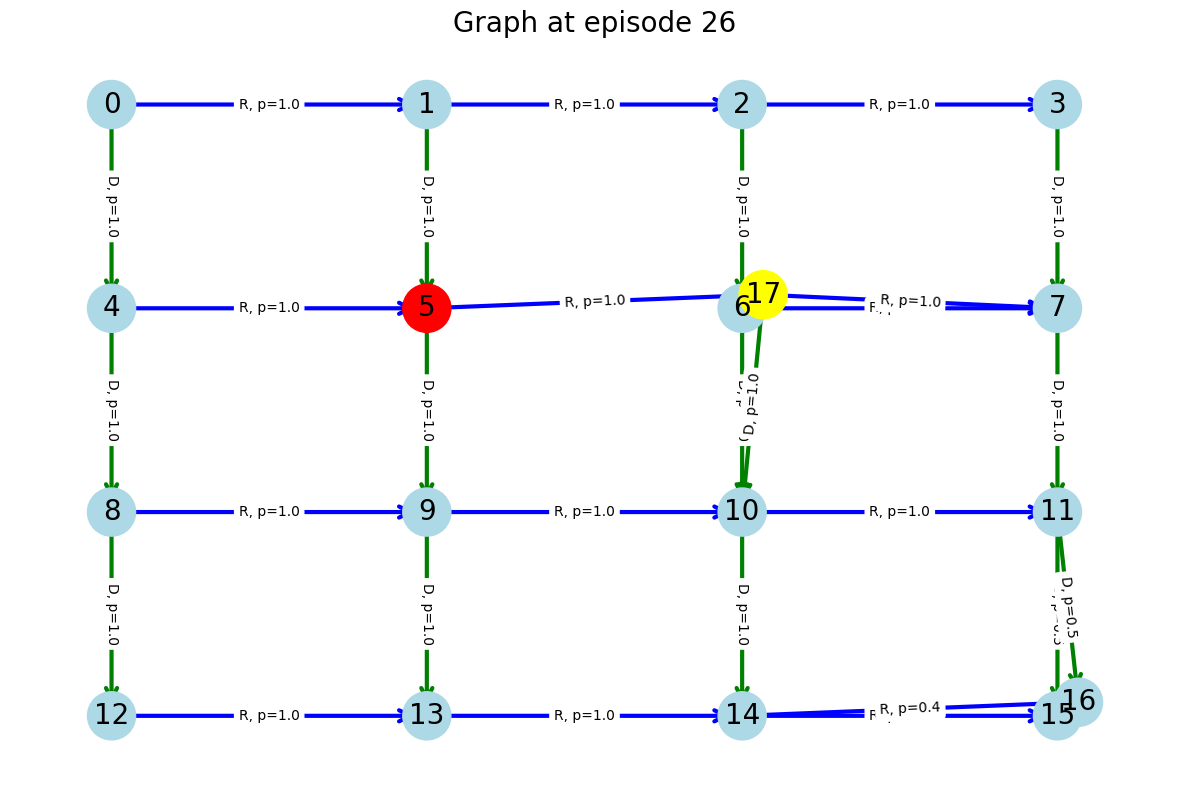

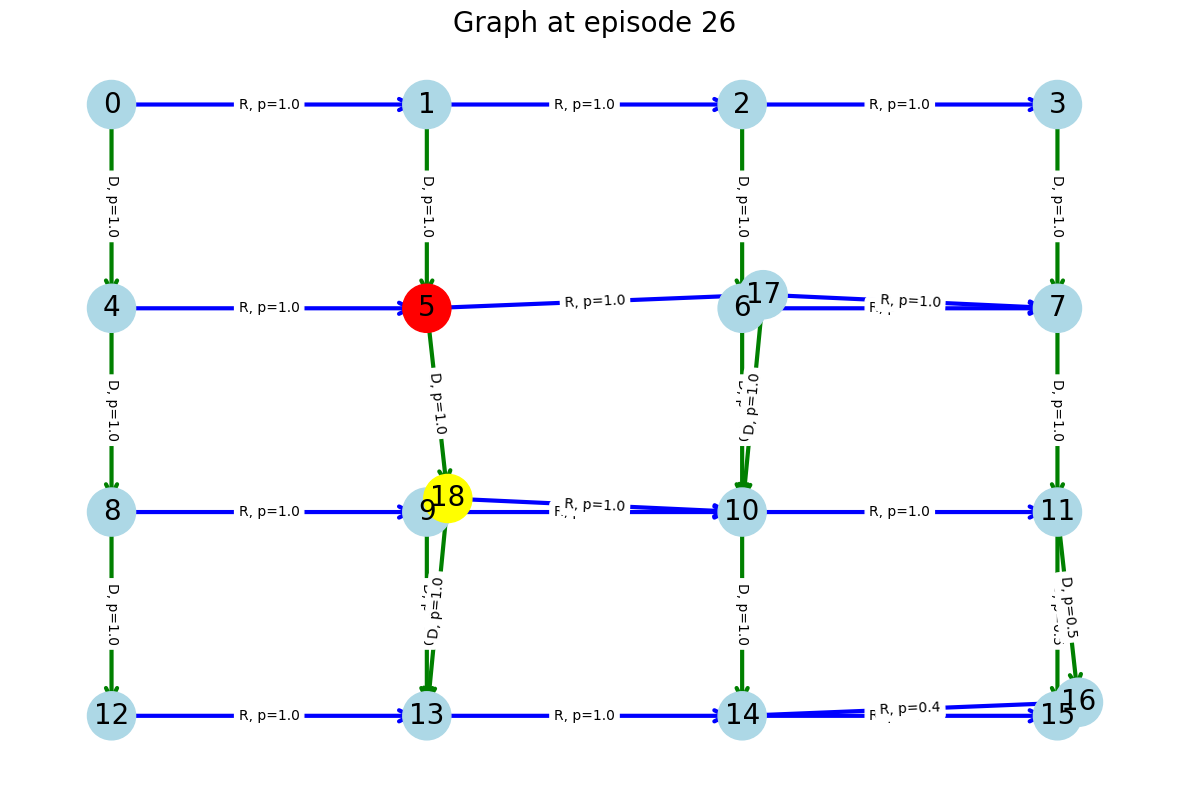

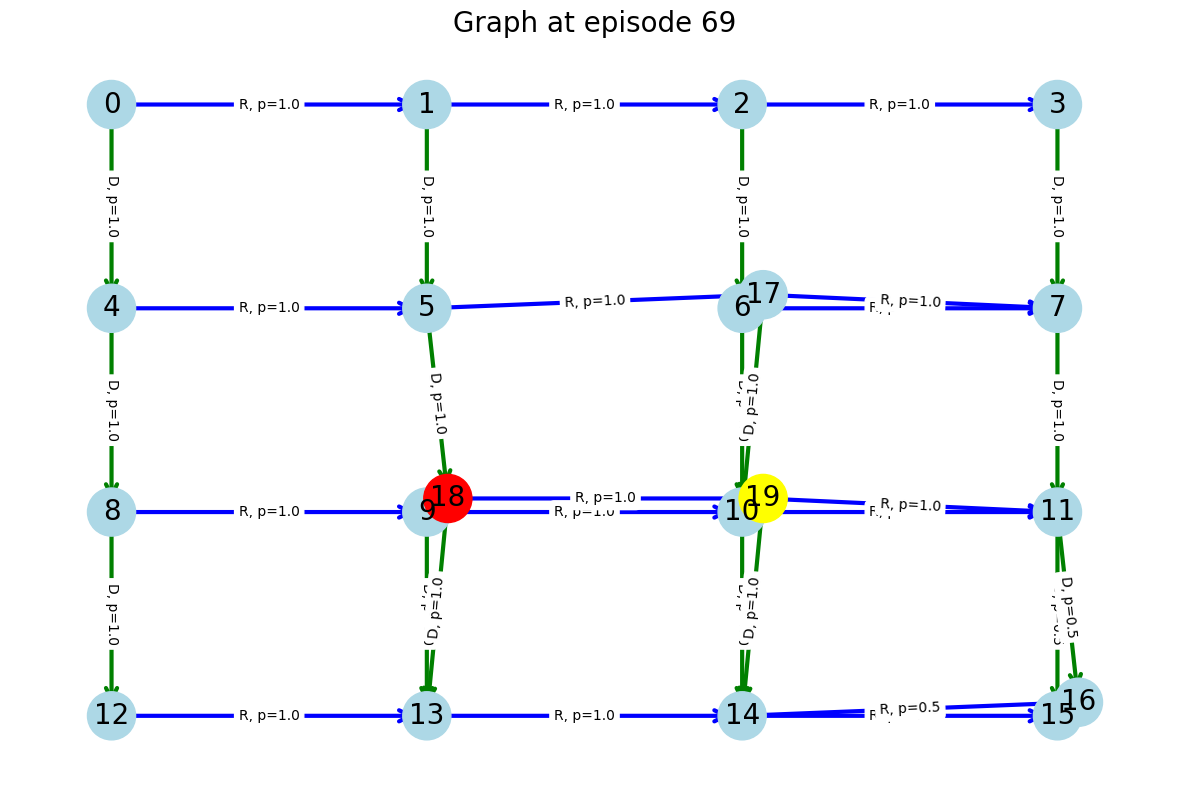

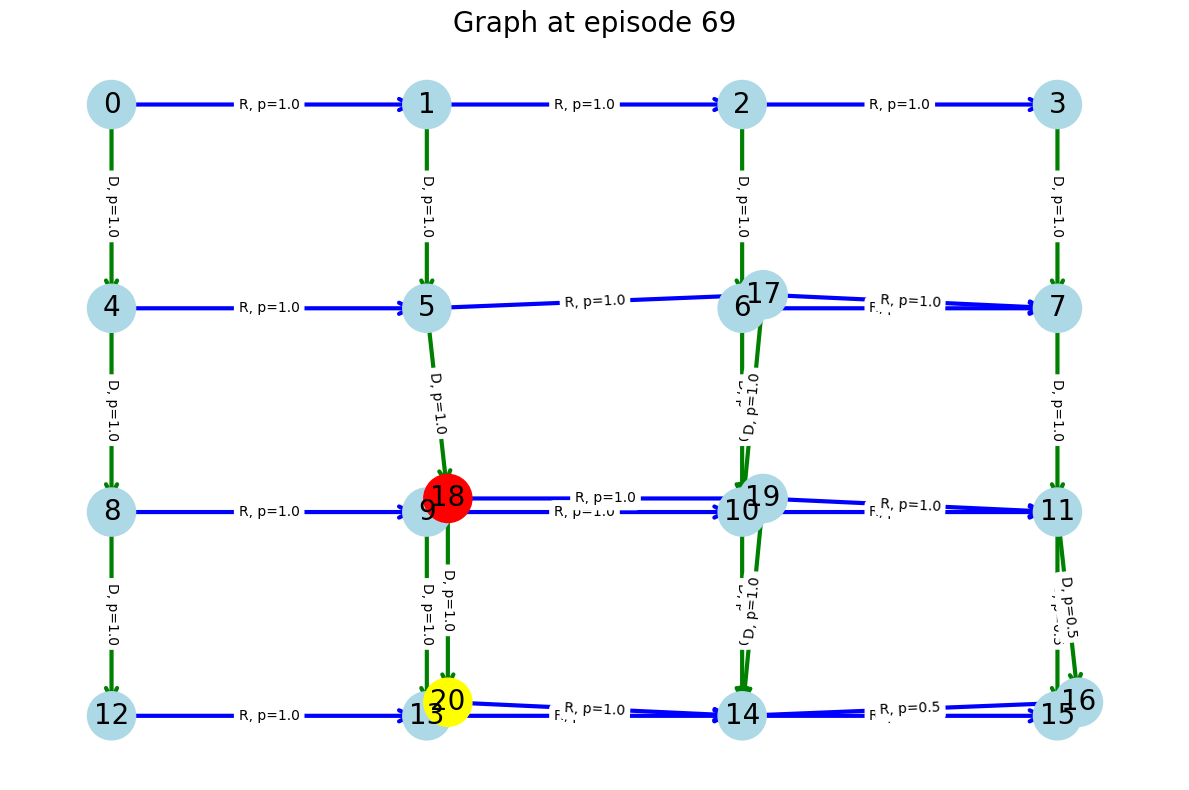

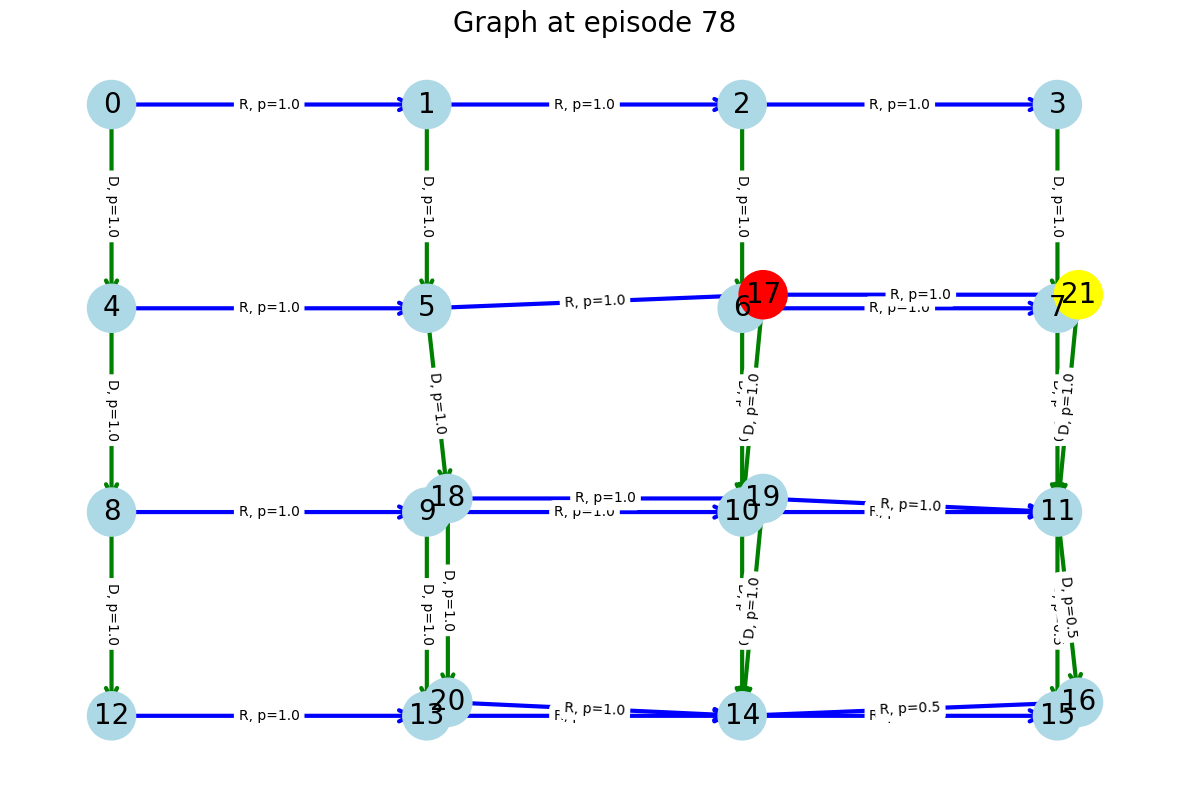

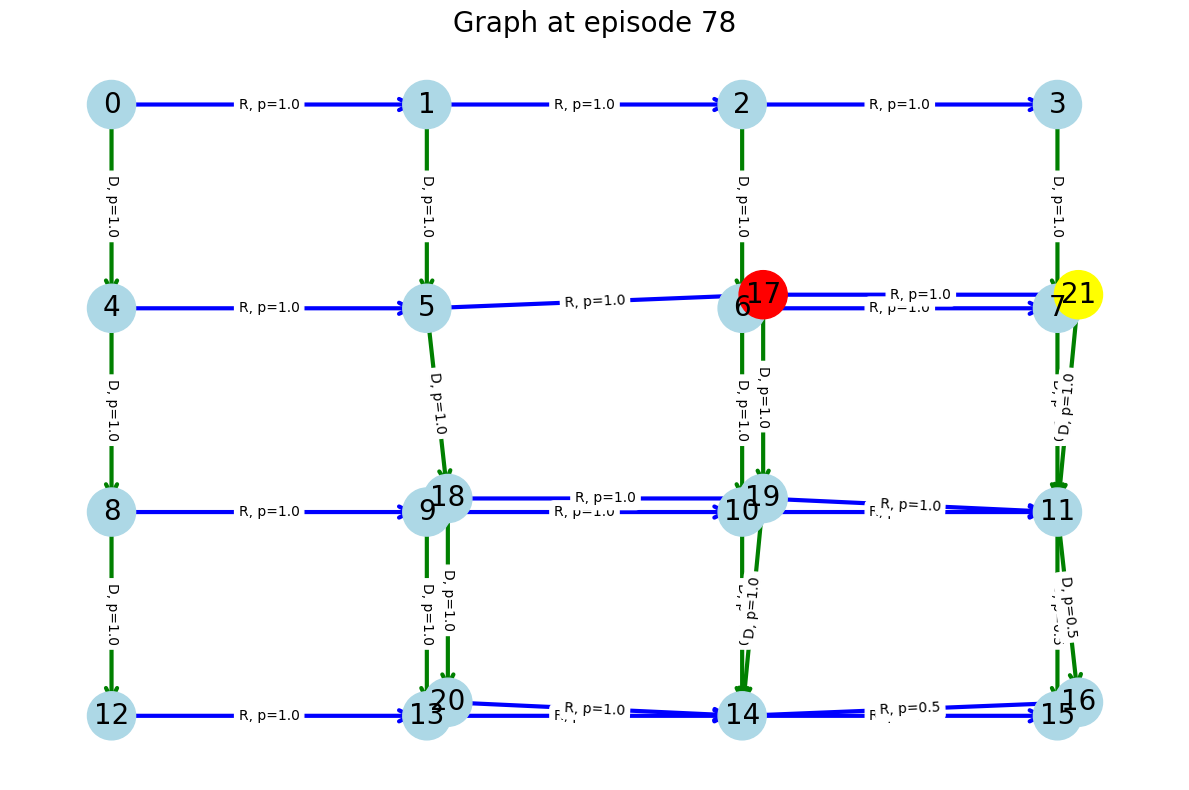

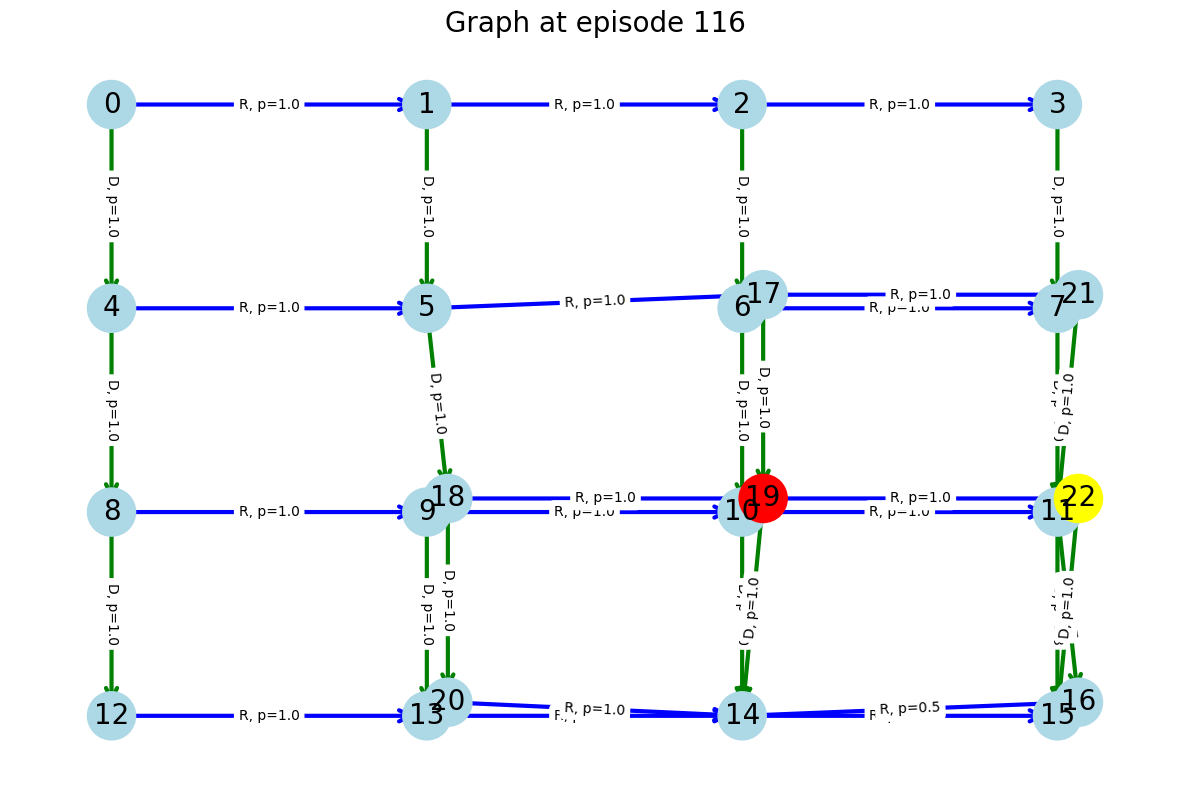

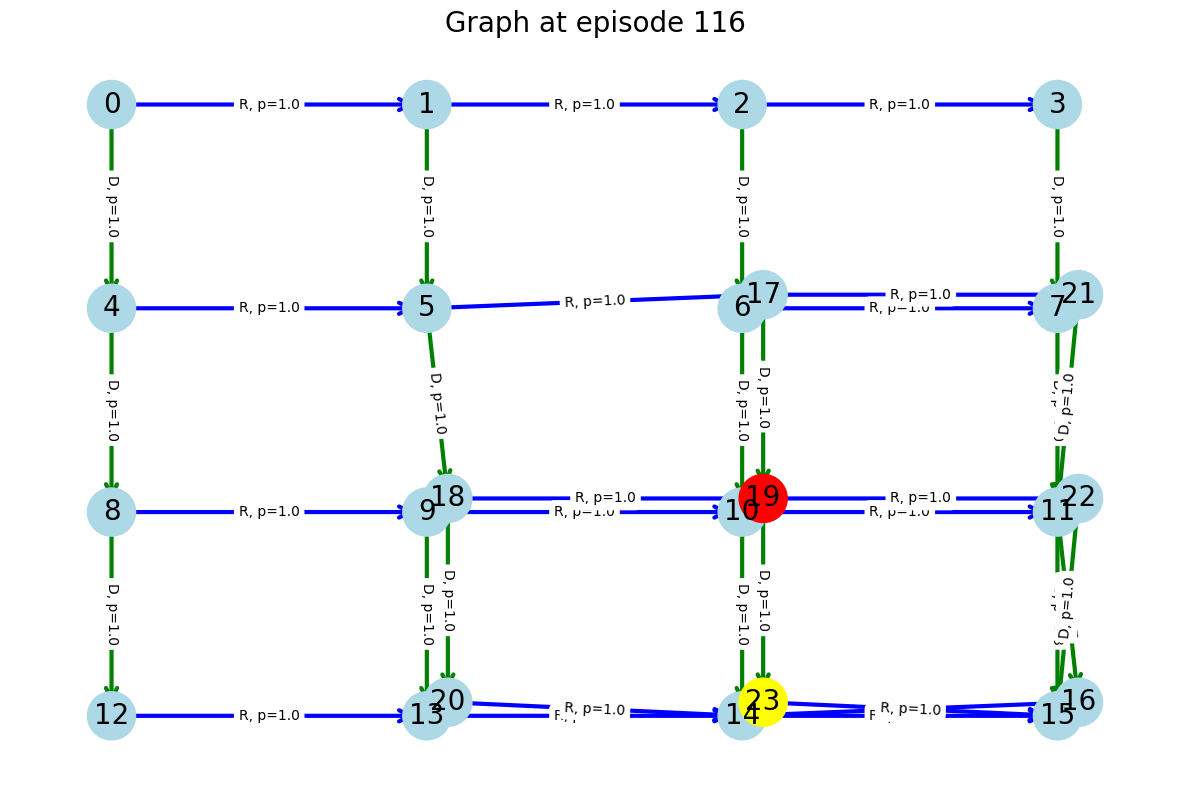

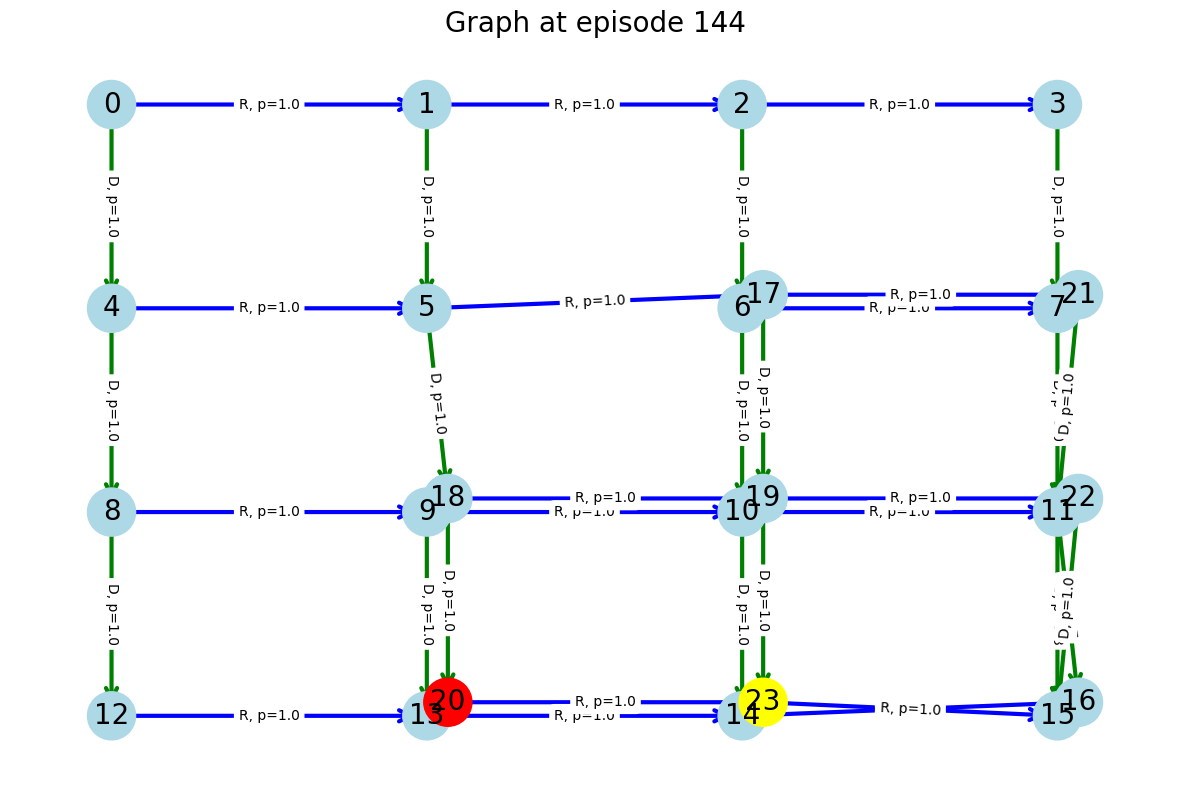

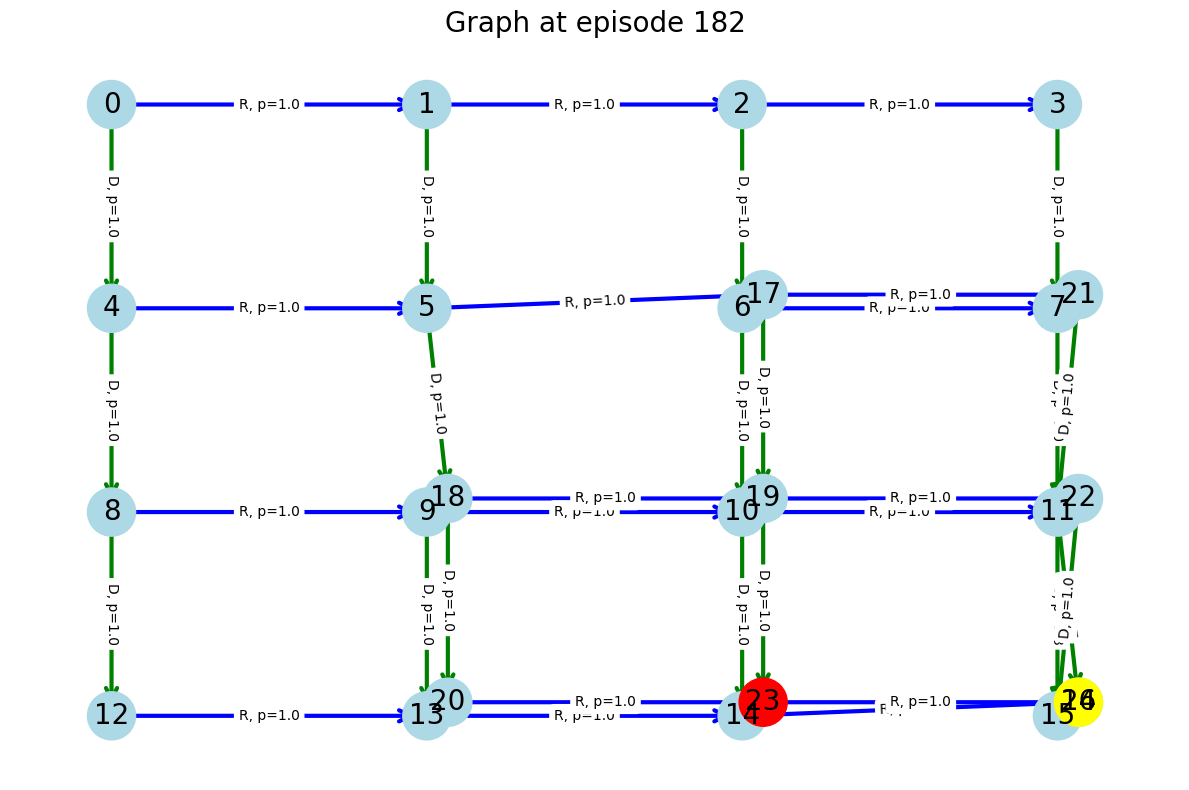

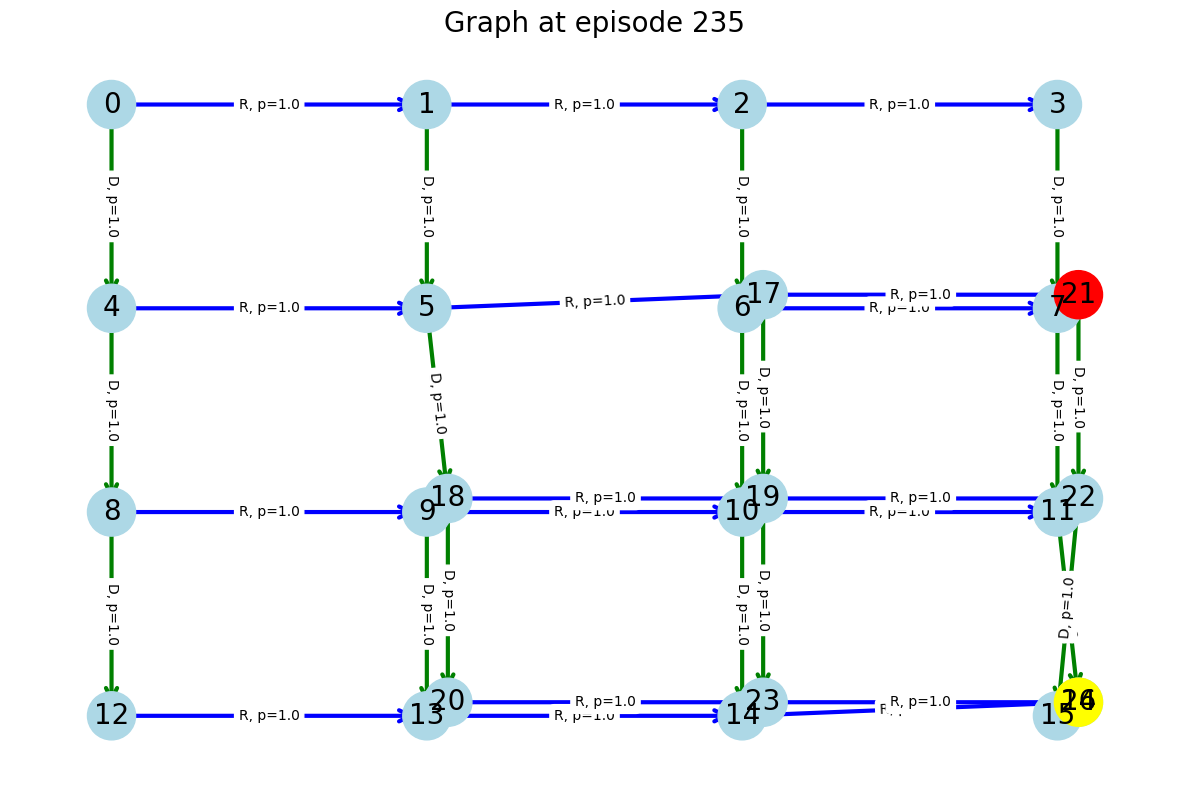



Finished splitting at episode 236


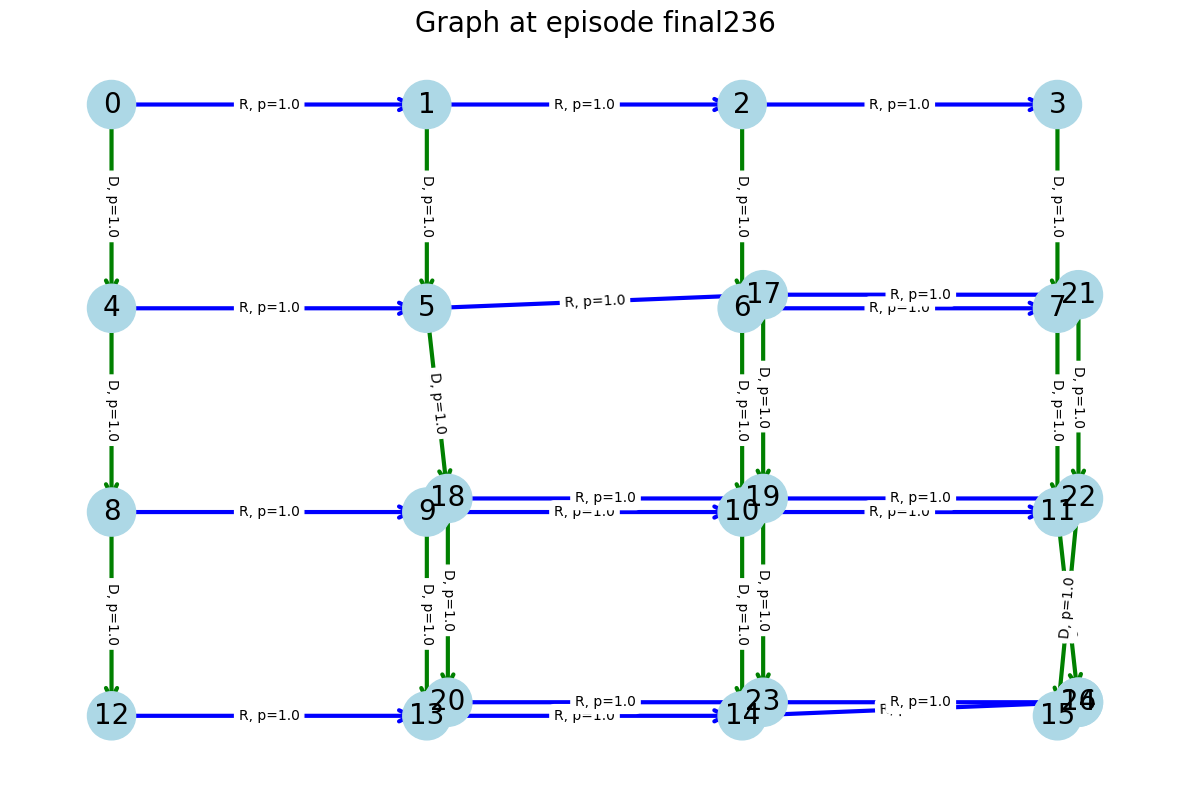

In [6]:
# Dataset
size = 4
env_size = (size,size)
rewarded_terminal = env_size[0]*env_size[1]-1
cue_states = [5]
env = GridEnvRightDownNoSelf(env_size=env_size, 
                             rewarded_terminal = [rewarded_terminal],
                             cue_states=cue_states)
# env = GridEnv(env_size=env_size, 
#                              rewarded_terminal = [rewarded_terminal],
#                              cue_states=cue_states)
# env = GridEnvRightDownNoSelf(cue_states=[6])

n_episodes = 1000
max_steps_per_episode = 100

episodes = generate_dataset(env, n_episodes, max_steps_per_episode)

n_states = max(max(pair[0]) for pair in episodes) + 1
E_r = np.zeros((1,n_states))
E_nr = np.zeros((1,n_states))
C = np.zeros((1,n_states))

# denominators.shape
actions = [0,1]
iterations=100
used_cues = []
graphiter = 0
savename='cued'
# env.plot_graph(transition_probs,'initial',savename=savename)  
done_split = False
# for i in range(iterations):
for e, episode in enumerate(episodes):
    # print("Iteration {}".format(e))
    
    observations = episode[0]
    actions = episode[1]
    
    if e == 0 :    
        transition_counts = transition_matrix_action_trial_by_trial(episodes,episode)
    else: 
        transition_counts = transition_matrix_action_trial_by_trial(episodes,episode, transition_counts)    
        


    # entropies, confidence = compute_transition_entropies_weighted(transition_counts)
    entropies, confidence_counts = compute_transition_entropies_thresholded(transition_counts)
    # stochastic_pairs = find_stochastic_state_actions_by_entropy_weighted(entropies, confidence, threshold=1) # (s,a,sprime,sprime2)
    stochastic_pairs = find_stochastic_state_actions_by_entropy_thresholded(entropies, confidence_counts, n_threshold=3) # (s,a,sprime,sprime2)

    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs: # s is something like 15 (->16)
            # print("Stochastic pairs: {}".format((s,a)))
            sprime, sprime2 = get_successor_states(transition_counts,s,a) # this is something like 16, 17
            # cue = calculate_backward_contingency(episodes, sprime, sprime2, env_size)
            E_r, E_nr, C = accumulate_conditioned_eligibility_traces(E_r, E_nr, C, episode[0], sprime, sprime2, 
                                                                  n_states, lam = 0.8, gamma=0.9)
            cue = calculate_backward_contingency_trial_by_trial(E_r, E_nr, C, env_size, n_threshold = 20)
            # cue = calculate_backward_contingency_trial_by_trial(E_r, E_nr, episodes, sprime, sprime2, env_size)
            cues.append(cue)
            # continue            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        split = False
        done_split = True
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            split=True # just split one at a time

            if cue > env.num_unique_states-1: #17: # cloned state, so need to get the valid actions from the original state
                valid_actions = env.get_valid_actions(env.clone_dict[cue])
            else:
                valid_actions = env.get_valid_actions(cue)
            for a in valid_actions:
                # print(cue,a)
                successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                if successor in env.reverse_clone_dict: # this has been created before
                    existing_clone = env.reverse_clone_dict[successor]
                    for d, seq in enumerate(episodes):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset
                                episodes[d][0] = [existing_clone if x==successor else x for x in episodes[d][0]] 

                else:    # hasn't been created before. split        
                    # split this as a function of whether it came from cue (6) vs. others
                    # has_state(sequence,)
                    n_unique_states = len(get_unique_states(episodes))
                    new_clone = n_unique_states            
                    
                    # clone_map.append((successor,new_clone))
                    env.add_clone_dict(new_clone, successor)
                    # clone_dict[new_clone] = successor
                    env.add_reverse_clone_dict(new_clone, successor)
                    # reverse_clone_dict[successor] = new_clone
                    for d, seq in enumerate(episodes):
                        
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset

                                episodes[d][0] = [new_clone if x==successor else x for x in episodes[d][0]] 
                                
                    # update number of states
                    n_states = max(max(pair[0]) for pair in episodes) + 1          
                    
                    
                    # update ET matrix
                    C = np.concatenate([C, np.zeros((1, 1))], axis=1)
                    E_r = np.concatenate([E_r, np.zeros((1, 1))], axis=1)
                    E_nr = np.concatenate([E_nr, np.zeros((1, 1))], axis=1)
                          
                                    
                # 2. modify transition count
                transition_counts = transition_matrix_action(episodes[:e])
                denominators = transition_counts.sum(axis=2, keepdims=True)
                denominators[denominators == 0] = 1
                transition_probs = transition_counts / denominators
                

                # graphiter = 0
                env.plot_graph(transition_probs,e, cue, new_clone,savename=savename)
                graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    elif done_split:
        print('Finished splitting at episode {}'.format(e))
        break
    
    # including merging process
    # if len(cues[0]) > 0:
        # merging
title_name = 'final' + str(e)            
env.plot_graph(transition_probs,title_name, savename=savename)    

In [7]:
episodes[:2]

[[[0, 5, 10, 11, 12, 17, 18, 23, 25], [1, 1, 0, 0, 1, 0, 1, 0]],
 [[0, 5, 6, 27, 12, 17, 22, 23, 24], [1, 0, 1, 0, 1, 1, 0, 0]]]

In [ ]:
len(cues[0])

In [ ]:
# Dataset
size = 5
env_size = (size,size)
rewarded_terminal = env_size[0]*env_size[1]-1
cue_states = [6]
env = GridEnvRightDownNoSelf(env_size=env_size, 
                             rewarded_terminal = [rewarded_terminal],
                             cue_states=cue_states)
# env = GridEnv(env_size=env_size, 
#                              rewarded_terminal = [rewarded_terminal],
#                              cue_states=cue_states)
# env = GridEnvRightDownNoSelf(cue_states=[6])

n_episodes = 1000
max_steps_per_episode = 100

dataset = generate_dataset(env, n_episodes, max_steps_per_episode)
transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0,1]
iterations=100
used_cues = []
graphiter = 0
savename='cued'
env.plot_graph(transition_probs,'initial',savename=savename)  

In [ ]:
a = dataset[0]

In [ ]:
a[0]

In [ ]:
a[1]

In [ ]:
E_r_ = np.reshape(E_r[-1,1:env_size[0]*env_size[1]+1], (env_size[0],env_size[1]))
E_r_ = np.transpose(E_r_)
sns.heatmap(E_r_)

In [ ]:
E_nr_ = np.reshape(E_nr[-1,1:env_size[0]*env_size[1]+1], (env_size[0],env_size[1]))
E_nr_ = np.transpose(E_nr_)
sns.heatmap(E_nr_)

In [ ]:
E_nr_ = E_nr[-1,1:env_size[0]*env_size[1]+1]
# E_nr_ = np.transpose(E_nr_)
E_nr_

E_r_ = E_r[-1,1:env_size[0]*env_size[1]+1]
E_r_

In [ ]:
E_contingency = E_r_ / (E_r_ + E_nr_ )
sns.heatmap(E_contingency)

In [ ]:
import seaborn as sns
dataset = generate_dataset(env, n_episodes, max_steps_per_episode)

sr = successor_representations(dataset, gamma=0.9, alpha=0.1, n_passes=5)

sns.heatmap(sr)

In [ ]:
pr = predecessor_representations(dataset, gamma=0.9, alpha=0.1, n_passes=5)

sns.heatmap(pr)

In [ ]:
tol=1e-9
# E_r = 
for s in range(np.shape(sr)[0]):
    dist = sr[s,:]
    p_nonzero = dist[dist > tol]
    
    # Normalize them so they sum to 1
    p_nonzero /= p_nonzero.sum()
    
    # Shannon entropy in bits
    #  E = - sum(p * log2(p))
    ent = -np.sum(p_nonzero * np.log2(p_nonzero))    
    print('Entropy for state {} is {}'.format(s,ent))

In [ ]:
np.unique(dataset[0][0])

In [ ]:
dataset = generate_dataset(env, n_episodes, max_steps_per_episode)
max(max(pair[0]) for pair in dataset)


In [ ]:
# # Functions for contingency & splitting

# def get_unique_states(dataset):
#     all_states = []
#     for states_seq, _ in dataset:
#         all_states.extend(states_seq)  # Flatten the list
#     unique_states = np.unique(all_states)
#     return unique_states

# def get_unique_states_from_env(env):
#     return [x for x in env.pos_to_state.values()]

# def has_state(sequence, state):
#     """Return True if the episode's state sequence contains state=5."""
#     return state in sequence

# def has_transition(s,sprime,sequence):
#     """Return True if the episode's state sequence contains a transition 15->16."""
#     for i in range(len(sequence) - 1):
#         if sequence[i] == s and sequence[i + 1] == sprime:
#             return True
#     return False

# # s=12
# # sprime=16
# # sprime2 = 17
# def calculate_contingency(dataset, s, sprime, sprime2):
#     unique_states = get_unique_states(dataset)
#     contingency_states = []
#     for curr_state in unique_states:
#         # if curr_state<100:
#         if (curr_state < s or curr_state > 17):    # maybe here
#             # print(curr_state)
#             # episodes_with_state = 0
#             # episodes_with_state_and_transition = 0
#             # other =0
#             # curr_state = 6

#             total = 0
#             a=0
#             b=0
#             c=0
#             d=0
#             conditioned_contingency=0
#             # print("Current state: {}".format(curr_state))
#             for states_seq, actions_seq in dataset:
#                 if has_state(states_seq,s):
#                     total += 1
#                     if has_state(states_seq, curr_state):
                    
                        
#                         # episodes_with_state += 1
#                         if has_transition(s,sprime,states_seq): 
#                             # episodes_with_state_and_transition += 1   
#                             a += 1
#                             # if curr_state==18:
#                             #     print('a:')
#                             #     print(states_seq)
#                             # print('transition: {}'.format(states_seq))
#                         elif has_transition(s,sprime2, states_seq): 
#                             # print(states_seq)
#                             b+=1
#                             # if curr_state==18:
#                             #     print('b:')
#                             #     print(states_seq)
#                     else: 
#                         # print('here')
#                         if has_transition(s,sprime,states_seq): 
#                             # episodes_with_state_and_transition += 1   
#                             c += 1
#                             # if curr_state==18:
#                             #     print('c:')
#                             #     print(states_seq)                            
                            
#                             # print('transition: {}'.format(states_seq))
#                         elif has_transition(s,sprime2, states_seq): 
#                             # print(states_seq)
#                             d+=1
#                             # if curr_state==18:
#                             #     print('d:')
#                             #     print(states_seq)                            
#                     assert total == a+b+c+d
#             # if curr_state == 18: 
#             #     print(a/(a+b), d/(c+d))
#             #     print(a,b,c,d)
#             # if a+b != 0: 
#             #     print("forward contingency: {}".format(a/(a+b)))
#             # else: 
#             #     print("no forward contingency")
#             # if c+d != 0: 
#             #     print("backward contingency: {}".format(d/(c+d)))
#             # else: 
#             #     print("no backward contingency")
#             if a+b !=0 and c+d != 0: 
#                 # if (a/(a+b)==1 and d/(c+d)==1):
#                 if a/(a+b)==1: # and d/(c+d)==1):
                    
#                     contingency_states.append(curr_state)
#         print(f"state {curr_state} has a value {a} and b value {b} leading to a/(a+b) = {a/(a+b) if a+b != 0 else -1}")
#         # print(f"state {curr_state} has a value {a} and c value {c} leading to a/(a+c) = {a/(a+c) if a+c != 0 else -1}")
        
#     print(f"contigency states: {contingency_states}")
#     return contingency_states

# def calculate_contingency_tmaze(dataset, s, sprime, sprime2):
#     unique_states = get_unique_states(dataset)
#     contingency_states = []
#     for curr_state in unique_states:
#         # if curr_state<100:
#         # if (curr_state < s or curr_state > 17):
#             # print(curr_state)
#             # episodes_with_state = 0
#             # episodes_with_state_and_transition = 0
#             # other =0
#             # curr_state = 6

#         total = 0
#         a=0
#         b=0
#         c=0
#         d=0
#         conditioned_contingency=0
#         # print("Current state: {}".format(curr_state))
#         for states_seq, actions_seq in dataset:
#             if has_state(states_seq,s):
#                 total += 1
#                 if has_state(states_seq, curr_state):
                
                    
#                     # episodes_with_state += 1
#                     if has_transition(s,sprime,states_seq): 
#                         # episodes_with_state_and_transition += 1   
#                         a += 1
#                         # if curr_state==18:
#                         #     print('a:')
#                         #     print(states_seq)
#                         # print('transition: {}'.format(states_seq))
#                     elif has_transition(s,sprime2, states_seq): 
#                         # print(states_seq)
#                         b+=1
#                         # if curr_state==18:
#                         #     print('b:')
#                         #     print(states_seq)
#                 else: 
#                     # print('here')
#                     if has_transition(s,sprime,states_seq): 
#                         # episodes_with_state_and_transition += 1   
#                         c += 1
#                         # if curr_state==18:
#                         #     print('c:')
#                         #     print(states_seq)                            
                        
#                         # print('transition: {}'.format(states_seq))
#                     elif has_transition(s,sprime2, states_seq): 
#                         # print(states_seq)
#                         d+=1
#                         # if curr_state==18:
#                         #     print('d:')
#                         #     print(states_seq)                            
#                 # assert total == a+b+c+d
#         # if curr_state == 18: 
#         #     print(a/(a+b), d/(c+d))
#         #     print(a,b,c,d)
#         # if a+b != 0: 
#         #     print("forward contingency: {}".format(a/(a+b)))
#         # else: 
#         #     print("no forward contingency")
#         # if c+d != 0: 
#         #     print("backward contingency: {}".format(d/(c+d)))
#         # else: 
#         #     print("no backward contingency")
#         if a+b !=0 and c+d != 0: 
#             # if (a/(a+b)==1 and d/(c+d)==1):
#             if a/(a+b)==1: # and d/(c+d)==1):
                
#                 contingency_states.append(curr_state)

#     return contingency_states

                
# def get_successor_states(transition_counts,s,a):
#     next_states = transition_counts[s,a]
#     sprime = np.where(next_states!=0)[0]
#     return sprime

In [ ]:
np.shape(dataset[1][0])

In [ ]:
for i in range(len(dataset)):
    print(np.shape(dataset[i][0]), np.shape(dataset[i][1]))

In [ ]:
# Dataset
env = GridEnvDivergingSingleReward(cue_state=6)

n_episodes = 500
max_steps_per_episode = 10

dataset = generate_dataset(env, n_episodes, max_steps_per_episode)
transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0,1]
iterations=10
used_cues = []
# clone_map = []
clone_dict = {}
reverse_clone_dict = {}
graphiter = 0
savename='cued'
plot_graph(transition_probs,'initial',savename=savename)  
# Actual code
for i in range(iterations):
    print("Iteration {}".format(i))
    # figure out which transitions are highly stochastic
    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs:
            print("Stochastic pairs: {}".format((s,a)))
            # if len(vali)
            # valid_actions = env.get_valid_actions(s)
            tmp = get_successor_states(transition_counts,s,a)
            print(tmp)
            sprime, sprime2 = tmp

            print(f"successor states: {sprime}, {sprime2}")

            cue = calculate_contingency(dataset, s, sprime, sprime2)
            # print(cue)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            if cue > 17:
                print("Current cue: {} (clone of {})".format(cue, clone_dict[cue]))
            else:
                print("Current cue: {}".format(cue))
            
            # if cue not in used_cues:
            split=True # just split one at a time
            # valid actions
            # valid_actions = env.get_valid_actions(cue)
            # for a in valid_actions:  
            if cue > 17: # cloned state, so need to get the valid actions from the original state
                valid_actions = env.get_valid_actions(clone_dict[cue])
            else:
                valid_actions = env.get_valid_actions(cue)
            # clone_orig = clone_dict[]
            for a in valid_actions:
                # print(cue,a)
                successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                print(f"successor of cue {cue} is {successor}")
                # if reverse_clone_dict[successor]: # this has been created before
                if successor in reverse_clone_dict and reverse_clone_dict:
                    existing_clone = reverse_clone_dict[successor]
                    for d, seq in enumerate(dataset):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset

                                dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                else:    # hasn't been created before. split        
                    # split this as a function of whether it came from cue (6) vs. others
                    # has_state(sequence,)
                    print(2)
                    n_unique_states = env.num_unique_states
                    new_clone = n_unique_states + 1   

                    # update the num of new states
                    env.num_unique_states = new_clone

                    print(f"new clone {new_clone} created")         
                    
                    # clone_map.append((successor,new_clone))
                    clone_dict[new_clone] = successor
                    reverse_clone_dict[successor] = new_clone
                    for d, seq in enumerate(dataset):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset

                                dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                # 2. modify transition count
                transition_counts =transition_matrix_action(dataset)
                denominators = transition_counts.sum(axis=2, keepdims=True)
                denominators[denominators == 0] = 1
                transition_probs = transition_counts / denominators
                # graphiter = 0
                plot_graph(transition_probs,graphiter, cue, new_clone,savename=savename)
                graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
plot_graph(transition_probs,'final', savename=savename)    

# Dataset with no cue (just stochastic transition to 16 or 17)


In [ ]:
# Dataset
env = GridEnvRightDownNoCue()

n_episodes = 500
max_steps_per_episode = 10

dataset = generate_dataset(env, n_episodes, max_steps_per_episode)
transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0,1]
iterations=10
used_cues = []
# clone_map = []
clone_dict = {}
reverse_clone_dict = {}
graphiter = 0
savename = 'nocue'
env.plot_graph(transition_probs,'initial',savename=savename)  
# Actual code
for i in range(iterations):
    print("Iteration {}".format(i))
    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs:
            print("Stochastic pairs: {}".format((s,a)))
            # if len(vali)
            # valid_actions = env.get_valid_actions(s)
            sprime, sprime2 = get_successor_states(transition_counts,s,a)
            cue = calculate_contingency(dataset, s, sprime, sprime2)
            print(cue)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            if cue > 17:
                print("Current cue: {} (clone of {})".format(cue, clone_dict[cue]))
            else:
                print("Current cue: {}".format(cue))
            
            # if cue not in used_cues:
            split=True # just split one at a time
            # valid actions
            # valid_actions = env.get_valid_actions(cue)
            # for a in valid_actions:  
            if cue > 17: # cloned state, so need to get the valid actions from the original state
                valid_actions = env.get_valid_actions(clone_dict[cue])
            else:
                valid_actions = env.get_valid_actions(cue)
            # clone_orig = clone_dict[]
            for a in valid_actions:
                # print(cue,a)
                successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                # if reverse_clone_dict[successor]: # this has been created before
                if successor in reverse_clone_dict:
                    existing_clone = reverse_clone_dict[successor]
                    for d, seq in enumerate(dataset):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset

                                dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                else:    # hasn't been created before. split        
                    # split this as a function of whether it came from cue (6) vs. others
                    # has_state(sequence,)
                    n_unique_states = len(get_unique_states(dataset))
                    new_clone = n_unique_states + 1            
                    
                    # clone_map.append((successor,new_clone))
                    clone_dict[new_clone] = successor
                    reverse_clone_dict[successor] = new_clone
                    for d, seq in enumerate(dataset):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset

                                dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                # 2. modify transition count
                transition_counts = transition_matrix_action(dataset)
                denominators = transition_counts.sum(axis=2, keepdims=True)
                denominators[denominators == 0] = 1
                transition_probs = transition_counts / denominators
                # graphiter = 0
                env.plot_graph(transition_probs,graphiter, cue, new_clone,savename=savename)
                graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
env.plot_graph(transition_probs,'final',savename=savename)    

# Splitter cell experiment

In [ ]:
def plot_graph_nogrid(T, niter, highlight_node=0, highlight_node_2=0, save=True, savename='nogrid'):
    # plot_graph_nogrid(transition_probs,graphiter, cue, new_clone,savename=savename)
    # transition_probs,graphiter, cue, new_clone,savename=savename
    n_state = np.shape(T)[0]
    n_action = np.shape(T)[1]
    # T = np.random.rand(n_state, n_action, n_state)
    # Normalize so that each [s,a,:] sums to 1 (like proper probabilities)
    # for s in range(n_state):
    #     for a in range(n_action):
    #         T[s, a, :] /= T[s, a, :].sum()

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add edges
    for s in range(n_state):
        for a in range(n_action):
            for s_next in range(n_state):
                prob = T[s, a, s_next]
                if prob > 0:
                    # You can store an edge label that contains the action 
                    # and probability.
                    G.add_edge(
                        f"{s}", f"{s_next}", 
                        label=f"A{a}, p={prob:.2f}"
                    )
    # Create a color list; default 'lightblue', but 'red' for special_node
    colors = []
    for node in G.nodes():
        if node == highlight_node:
            colors.append("red")
        elif node == highlight_node_2:
            colors.append("yellow")
        else:
            colors.append("lightblue")
    # Layout the graph
    pos = nx.shell_layout(G)  # you can choose any layout

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=colors)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.axis('off')
    plt.title("Iteration {}".format(niter))
    plt.show()


In [ ]:
np.shape(transition_probs)[1]

In [ ]:
# TODO: Talking points
# - why is there a random extra one?
# - how should the paths for continuous T-Maze be generated - just stop at a certain length or once there is a rewward?
# - should the cue's randomly change for the continuous T-Maze?


In [ ]:
def generate_CT_walks(model:ContinuousTMaze, num_observations:int=100) -> list:
    """Function that returns a list of observed states with debugging info"""
    dataset = []
    start_end_pairs = []  # Keep track of start/end pairs

    for i in range(num_observations):
        model.reset()
        start_state = model.current_state
        states = [model.current_state]
        actions = []

        while model.running:
            valid_actions = model.get_valid_actions(model.current_state)
            if not valid_actions:
                break
                
            action = random.choice(valid_actions)
            model.step(action)

            actions.append(action)
            states.append(model.current_state)
        
        end_state = states[-1]
        start_end_pairs.append((start_state, end_state))
        states.append(states[0])  # add the starting state to the end
        dataset.append([states, actions])
        
        # Print debugging info every 10 walks
        if i % 10 == 0:
            print(f"Walk {i}:")
            print(f"  Start state: {start_state}")
            print(f"  Path: {states}")
            print(f"  End state: {end_state}")
            print()

    # Print summary statistics
    print("\nSummary of start/end state pairs:")
    from collections import Counter
    pair_counts = Counter(start_end_pairs)
    for pair, count in pair_counts.items():
        print(f"Start: {pair[0]} -> End: {pair[1]}: {count} times")
    
    return dataset

# TODO: CHECK TO SEE IF ITS THE ALTERNATING TMAZE OR JUST RANDOM

In [ ]:
env = ContinuousTMaze()

dataset = generate_CT_walks(env, 100)

for x, _ in dataset:
    if 5 in x:
        print("sdfjhasodfguowf")

transition_counts = transition_matrix_action(dataset)

denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0,1]
iterations=20
used_cues = []
# clone_map = []
clone_dict = {}
reverse_clone_dict = {}
graphiter = 0
savename='ctmaze'
env.plot_graph(transition_probs,'initial',savename=savename)  
# Actual code
for i in range(iterations):
    print("Iteration {}".format(i))
    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs:
            print("Stochastic pairs: {}".format((s,a)))
            # if len(vali)
            # valid_actions = env.get_valid_actions(s)
            sprime, sprime2 = get_successor_states(transition_counts,s,a)
            cue = calculate_contingency_tmaze(dataset, s, sprime, sprime2)
            print(cue)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        print(unique_cues)
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            if cue > 6:
                print("Current cue: {} (clone of {})".format(cue, clone_dict[cue]))
            else:
                print("Current cue: {}".format(cue))
            
            # if cue not in used_cues:
            split=True # just split one at a time
            # valid actions
            # valid_actions = env.get_valid_actions(cue)
            # for a in valid_actions:  
            # if cue > 6: # cloned state, so need to get the valid actions from the original state
            #     valid_actions = env.get_valid_actions(clone_dict[cue])
            # else:
            #     valid_actions = env.get_valid_actions(cue)
            # clone_orig = clone_dict[]
            for a in actions:
                # print(cue,a)
                if get_successor_states(transition_counts,cue,a).size>0:
                    successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                    # if reverse_clone_dict[successor]: # this has been created before
                    if successor in reverse_clone_dict:
                        existing_clone = reverse_clone_dict[successor]
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                    else:    # hasn't been created before. split        
                        # split this as a function of whether it came from cue (6) vs. others
                        # has_state(sequence,)
                        n_unique_states = len(get_unique_states(dataset))
                        new_clone = n_unique_states + 1            
                        
                        # clone_map.append((successor,new_clone))
                        clone_dict[new_clone] = successor
                        reverse_clone_dict[successor] = new_clone
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                    # 2. modify transition count
                    transition_counts = transition_matrix_action(dataset)
                    denominators = transition_counts.sum(axis=2, keepdims=True)
                    denominators[denominators == 0] = 1
                    transition_probs = transition_counts / denominators
                    # graphiter = 0
                    env.plot_graph(transition_probs,graphiter, cue, new_clone,savename=savename)
                    graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
env.plot_graph(transition_probs,'final', savename=savename)

In [ ]:
observation_1 = [1,0,3] # start 1, left turn, rewarded
observation_2 = [2,0,5] # start 2, right turn, rewarded
observation_3 = [1,0,6] # start 1, right turn, no reward
observation_4 = [2,0,4] # start 2, left turn, no reward
# 2: left turn, 4: right turn, 5: reward, 6: no reward
actions_1 = [0,1]
actions_2 = [0,2]
actions_3 = [0,2]
actions_4 = [0,1]
n_data = 100 #25
super_observations = np.array(([observation_1] * n_data) +
                          ([observation_2] * n_data) +
                          ([observation_3] * n_data) +
                          ([observation_4] * n_data))
# np.random.shuffle(super_observations)
# Build super_actions with the same structure
super_actions = np.array(([actions_1] * n_data) +
                         ([actions_2] * n_data) +
                         ([actions_3] * n_data) +
                         ([actions_4] * n_data))

# We now have 100 rows in each (25 x 4 = 100).
# Shuffle them in the *same* order using a random permutation of indices
permutation = np.random.permutation(len(super_observations))

# Apply the permutation to both arrays
super_observations = super_observations[permutation]
super_actions = super_actions[permutation]
dataset=[]
for l in range(len(super_observations)):
    dataset.append([super_observations[l], super_actions[l]])



transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0,1,2]
iterations=20
used_cues = []
# clone_map = []
clone_dict = {}
reverse_clone_dict = {}
graphiter = 0
savename='tmaze'
plot_graph_nogrid(transition_probs,'initial',savename=savename)  
# Actual code
for i in range(iterations):
    print("Iteration {}".format(i))
    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs:
            print("Stochastic pairs: {}".format((s,a)))
            # if len(vali)
            # valid_actions = env.get_valid_actions(s)
            sprime, sprime2 = get_successor_states(transition_counts,s,a)
            cue = calculate_contingency_tmaze(dataset, s, sprime, sprime2)
            print(cue)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        print(unique_cues)
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            if cue > 6:
                print("Current cue: {} (clone of {})".format(cue, clone_dict[cue]))
            else:
                print("Current cue: {}".format(cue))
            
            # if cue not in used_cues:
            split=True # just split one at a time
            # valid actions
            # valid_actions = env.get_valid_actions(cue)
            # for a in valid_actions:  
            # if cue > 6: # cloned state, so need to get the valid actions from the original state
            #     valid_actions = env.get_valid_actions(clone_dict[cue])
            # else:
            #     valid_actions = env.get_valid_actions(cue)
            # clone_orig = clone_dict[]
            for a in actions:
                # print(cue,a)
                if get_successor_states(transition_counts,cue,a).size>0:
                    successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                    # if reverse_clone_dict[successor]: # this has been created before
                    if successor in reverse_clone_dict:
                        existing_clone = reverse_clone_dict[successor]
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                    else:    # hasn't been created before. split        
                        # split this as a function of whether it came from cue (6) vs. others
                        # has_state(sequence,)
                        n_unique_states = len(get_unique_states(dataset))
                        new_clone = n_unique_states + 1            
                        
                        # clone_map.append((successor,new_clone))
                        clone_dict[new_clone] = successor
                        reverse_clone_dict[successor] = new_clone
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                    # 2. modify transition count
                    transition_counts = transition_matrix_action(dataset)
                    denominators = transition_counts.sum(axis=2, keepdims=True)
                    denominators[denominators == 0] = 1
                    transition_probs = transition_counts / denominators
                    # graphiter = 0
                    plot_graph_nogrid(transition_probs,graphiter, cue, new_clone,savename=savename)
                    graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
plot_graph_nogrid(transition_probs,'final', savename=savename)    

In [ ]:
get_successor_states(transition_counts,cue,a)

In [ ]:
transition_counts[4,0]

In [ ]:
get_successor_states(transition_counts,1,0)


# Appendix — Trial‑by‑trial CoDA with **uncertainty‑aware splitting**

This section adds an online split rule that **requires high posterior confidence** that the
prospective contingency exceeds `theta_split`, along with **episode‑level presence** and **minimum exposure** gates.


In [ ]:

import sys, numpy as np
sys.path.append('/mnt/data')
from coda_trial_by_trial import (
    CoDAAgent, CoDAConfig,
    GridEnvRightDownNoSelf, GridEnvRightDownNoCue,
    generate_episode, posterior_prob_p_greater_than
)
import matplotlib.pyplot as plt


In [ ]:

# Configure uncertainty-aware splitting
cfg = CoDAConfig(
    gamma=0.9, lam=0.8,
    theta_split=0.9, theta_merge=0.5,
    n_threshold=8,                 # min step-level evidence
    min_presence_episodes=8,       # min episode-level presence
    min_effective_exposure=25.0,   # min E_r + E_nr
    confidence=0.95,               # require P(p>theta_split | data) >= 0.95
    alpha0=0.5, beta0=0.5          # Jeffreys prior
)

env = GridEnvRightDownNoSelf(cue_states=[5], env_size=(4,4), rewarded_terminal=[15])
agent = CoDAAgent(env, cfg)


In [ ]:

# Acquisition: run episodes and allow splitting when uncertainty gates are satisfied
split_eps = []
with_clones = False
for ep in range(1, 400):
    states, actions = generate_episode(env, T=agent.get_T() if with_clones else None, max_steps=20)
    agent.update_with_episode(states, actions)
    new = agent.maybe_split()
    if new:
        with_clones = True
        split_eps.extend([ep]*len(new))
        # optional: stop early once we see the first split
        # break

print("Split episodes:", split_eps)


In [ ]:

# Diagnostics: PC, posterior tail prob, and RC
pc = agent.prospective()
rc = agent.retrospective()
exposure = (agent.E_r + agent.E_nr).reshape(-1)
post_tail = np.array([posterior_prob_p_greater_than(cfg.theta_split, agent.E_r[0,i], agent.E_nr[0,i], cfg.alpha0, cfg.beta0) for i in range(agent.n_states)])

# Plot prospective contingency
plt.figure()
plt.title("Prospective contingency P(US|CS)")
plt.plot(pc, marker='o')
plt.axhline(cfg.theta_split, linestyle='--')
plt.xlabel("state index"); plt.ylabel("PC")
plt.show()

# Plot posterior tail probability
plt.figure()
plt.title(f"Posterior tail Pr[P(US|CS)>={cfg.theta_split}]")
plt.plot(post_tail, marker='o')
plt.axhline(cfg.confidence, linestyle='--')
plt.xlabel("state index"); plt.ylabel("tail prob")
plt.show()

# Plot retrospective contingency
plt.figure()
plt.title("Retrospective contingency P(CS|US)")
plt.plot(rc, marker='o')
plt.xlabel("state index"); plt.ylabel("RC")
plt.show()


In [ ]:

# Extinction-like phase: reward no longer depends on cue, so informativeness drops and merges should occur
env2 = GridEnvRightDownNoCue(cue_states=[5], env_size=(4,4), rewarded_terminal=[15])
env2.clone_dict = dict(agent.env.clone_dict)
env2.reverse_clone_dict = dict(agent.env.reverse_clone_dict)
agent.env = env2

merge_eps = []
for ep in range(400, 900):
    states, actions = generate_episode(env2, T=agent.get_T(), max_steps=20)
    agent.update_with_episode(states, actions)
    merged = agent.maybe_merge()
    if merged:
        merge_eps.extend([ep]*len(merged))

print("Merge episodes:", merge_eps)
